# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

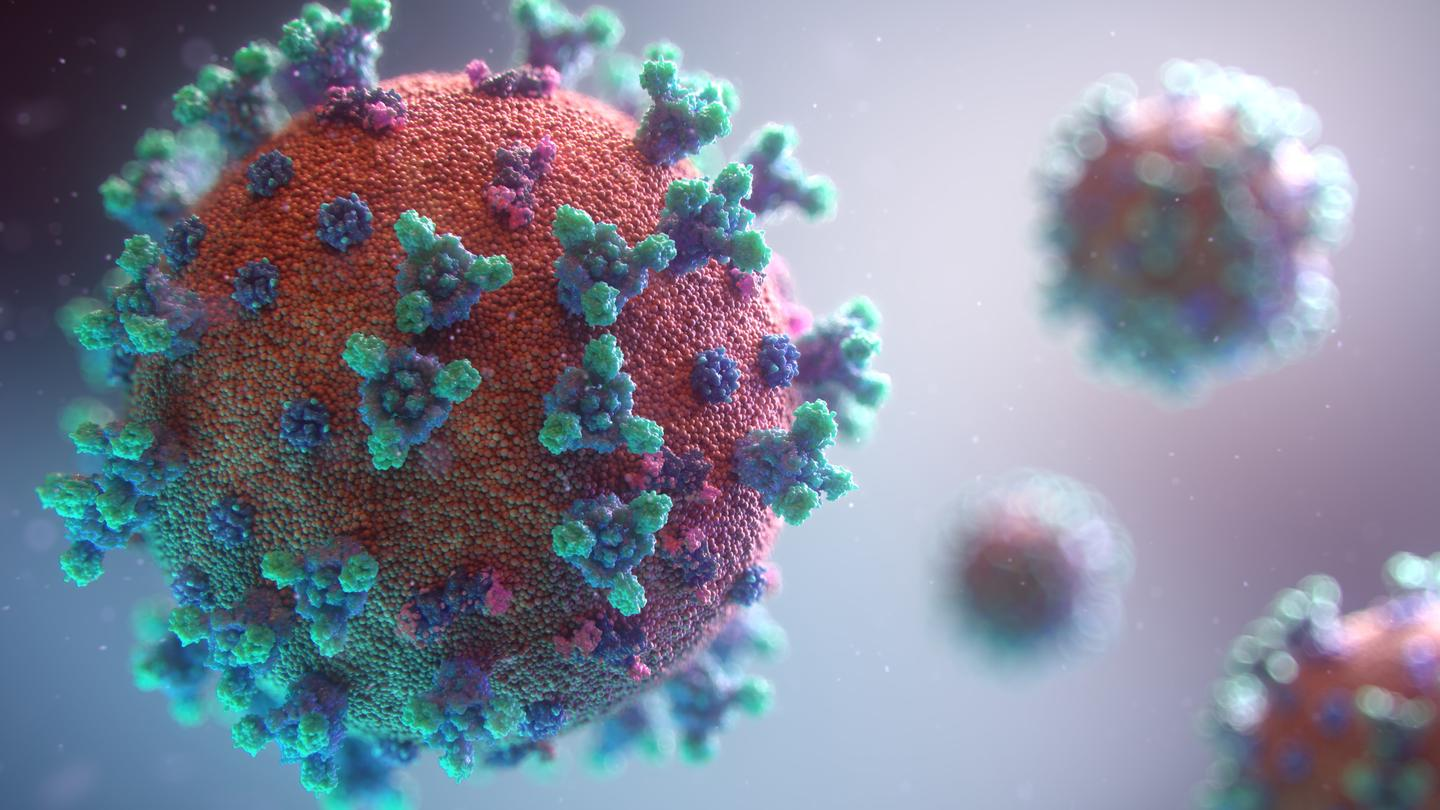

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(206150, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206150 entries, 0 to 206149
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    206150 non-null  object 
 1   continent                                   194231 non-null  object 
 2   location                                    206150 non-null  object 
 3   date                                        206150 non-null  object 
 4   total_cases                                 197784 non-null  float64
 5   new_cases                                   197556 non-null  float64
 6   new_cases_smoothed                          196379 non-null  float64
 7   total_deaths                                179022 non-null  float64
 8   new_deaths                                  178993 non-null  float64
 9   new_deaths_smoothed                         177826 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))                # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
206145 2022-07-30
206146 2022-07-31
206147 2022-08-01
206148 2022-08-02
206149 2022-08-03

[206150 rows x 1 columns]

In [10]:
df['day_name'] = df['date'].dt.day_name()                                    # add name of the day
df['day'] = df['date'].dt.day                                                # day
df['month_num'] = df['date'].dt.month                                        # add month number
df['year'] =  df['date'].dt.year                                             # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
206145  2022          7   30   Saturday
206146  2022          7   31     Sunday
206147  2022          8    1     Monday
206148  2022          8    2    Tuesday
206149  2022          8    3  Wednesday

[206150 rows x 4 columns]

In [11]:
# assign month names
def assign_month_name(x):
  if x == 1:
    return 'Jan'
  elif x == 2:
    return 'Feb'
  elif x == 3:
     return 'Mar'
  elif x == 4:
    return 'Apr'
  elif x == 5:
    return 'May'
  elif x == 6:
     return 'June'
  elif x == 7:
    return 'July'
  elif x == 8:
    return 'Aug'
  elif x == 9:
    return 'Sep'
  elif x == 10:
    return 'Oct'
  elif x == 11:
    return 'Nov'
  else:
    return 'Dec'

df['month_name'] = df['month_num'].apply(assign_month_name)
df['month_name'].value_counts()

May     21595
July    21594
June    20971
Apr     20655
Mar     19558
Aug     15112
Jan     14887
Feb     14736
Dec     14512
Oct     14479
Nov     14070
Sep     13981
Name: month_name, dtype: int64

In [12]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

[Text(0.5, 1.0, 'Total count by month name'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Month Name')]

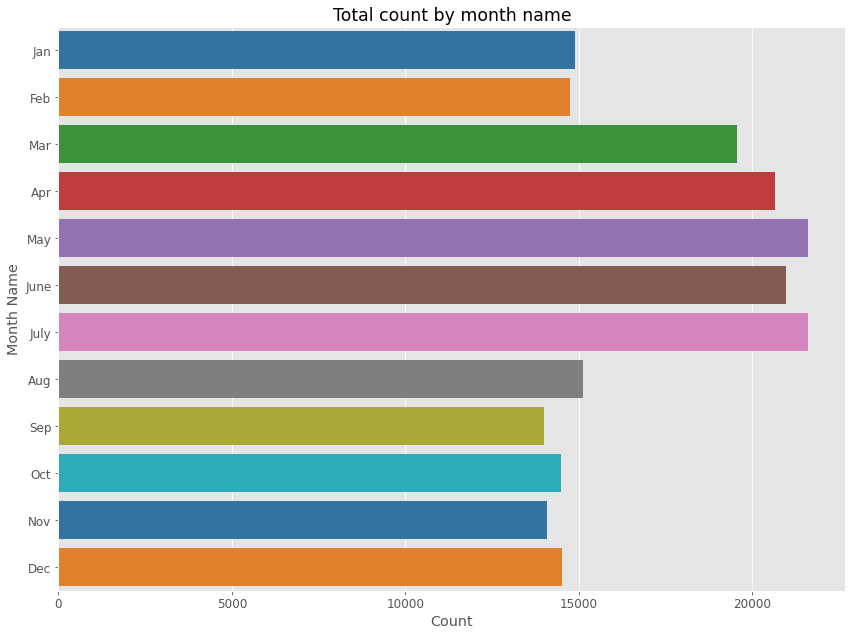

In [13]:
fig, ax = plt.subplots()

sns.countplot(data=df, y='month_name', hue_order='month_name', palette='tab10')

ax.set(title='Total count by month name', xlabel='Count',  ylabel='Month Name')

# Missing Data Exploration

In [14]:
df.isna().sum()                                        # over 50 % missing data in some columns

iso_code                                           0
continent                                      11919
location                                           0
date                                               0
total_cases                                     8366
new_cases                                       8594
new_cases_smoothed                              9771
total_deaths                                   27128
new_deaths                                     27157
new_deaths_smoothed                            28324
total_cases_per_million                         9275
new_cases_per_million                           9503
new_cases_smoothed_per_million                 10675
total_deaths_per_million                       28024
new_deaths_per_million                         28053
new_deaths_smoothed_per_million                29215
reproduction_rate                              54558
icu_patients                                  178897
icu_patients_per_million                      

<AxesSubplot:>

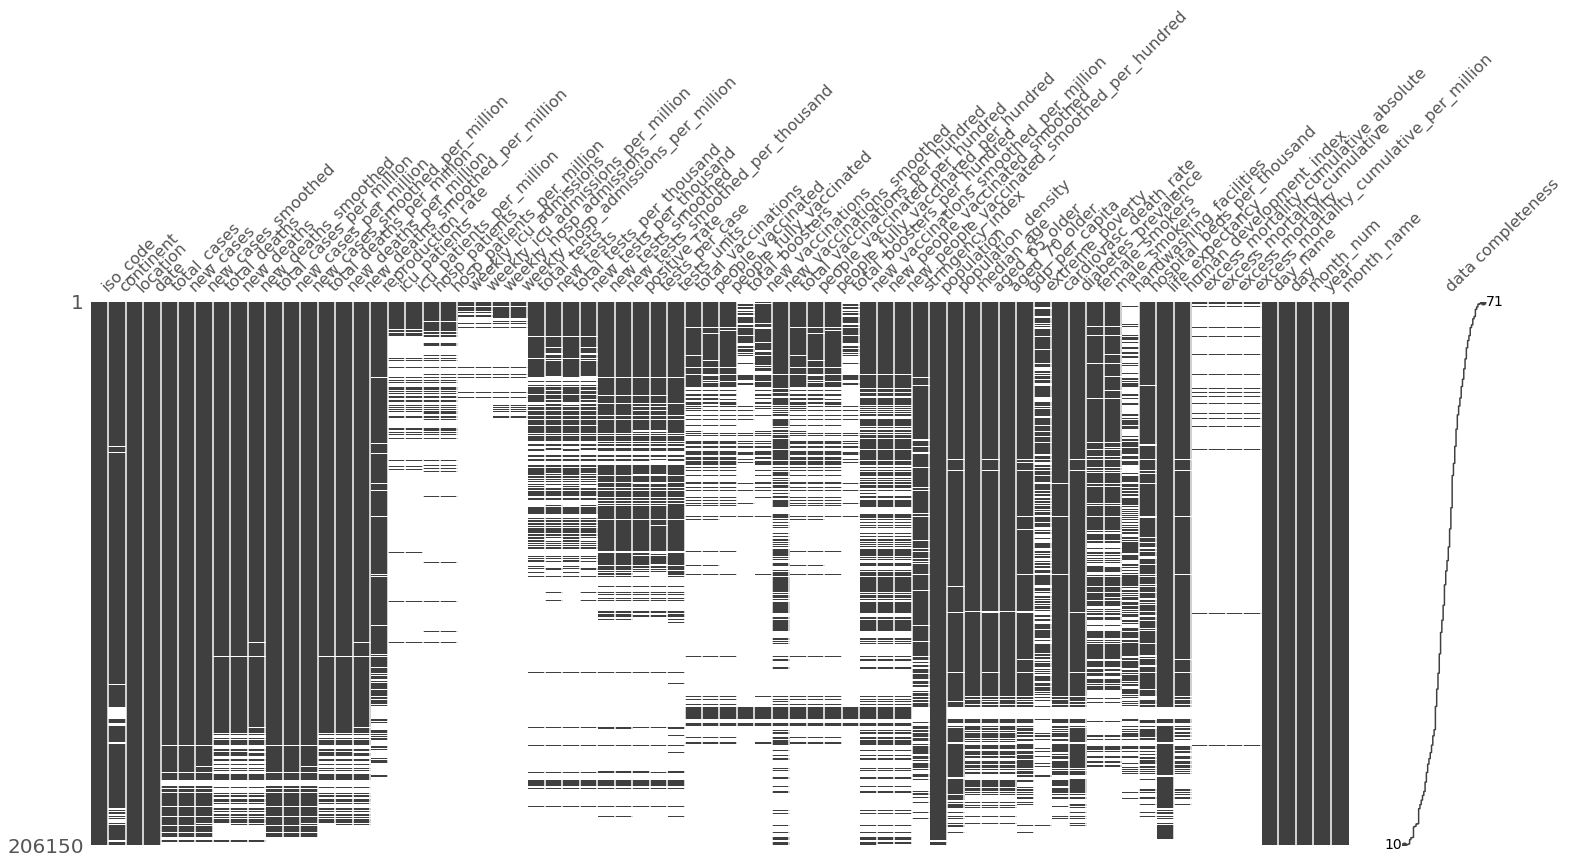

In [15]:
msno.matrix(df, labels=True, sort='descending')

Strategies for handling missing values: Using ffill()-forwardfill: according to the next observed value  OR bfill()-backfill: according to the last observed value 

In [16]:
df.bfill().isna().sum()                                 # 6126 rows still missing with the backward fill strategy

iso_code                                          0
continent                                         0
location                                          0
date                                              0
total_cases                                       0
new_cases                                         0
new_cases_smoothed                                0
total_deaths                                      0
new_deaths                                        0
new_deaths_smoothed                               0
total_cases_per_million                           0
new_cases_per_million                             0
new_cases_smoothed_per_million                    0
total_deaths_per_million                          0
new_deaths_per_million                            0
new_deaths_smoothed_per_million                   0
reproduction_rate                                19
icu_patients                                  10962
icu_patients_per_million                      10962
hosp_patient

In [17]:
df.ffill().isna().sum()                                  # 1487 rows missing with the forward fill strategy

iso_code                                          0
continent                                         0
location                                          0
date                                              0
total_cases                                       0
new_cases                                         0
new_cases_smoothed                                5
total_deaths                                     28
new_deaths                                       28
new_deaths_smoothed                              33
total_cases_per_million                           0
new_cases_per_million                             0
new_cases_smoothed_per_million                    5
total_deaths_per_million                         28
new_deaths_per_million                           28
new_deaths_smoothed_per_million                  33
reproduction_rate                                34
icu_patients                                   2829
icu_patients_per_million                       2829
hosp_patient

In [18]:
df_filled = df.ffill()                                   # adopt the forward fill strategy
df_filled.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_thousa

<AxesSubplot:>

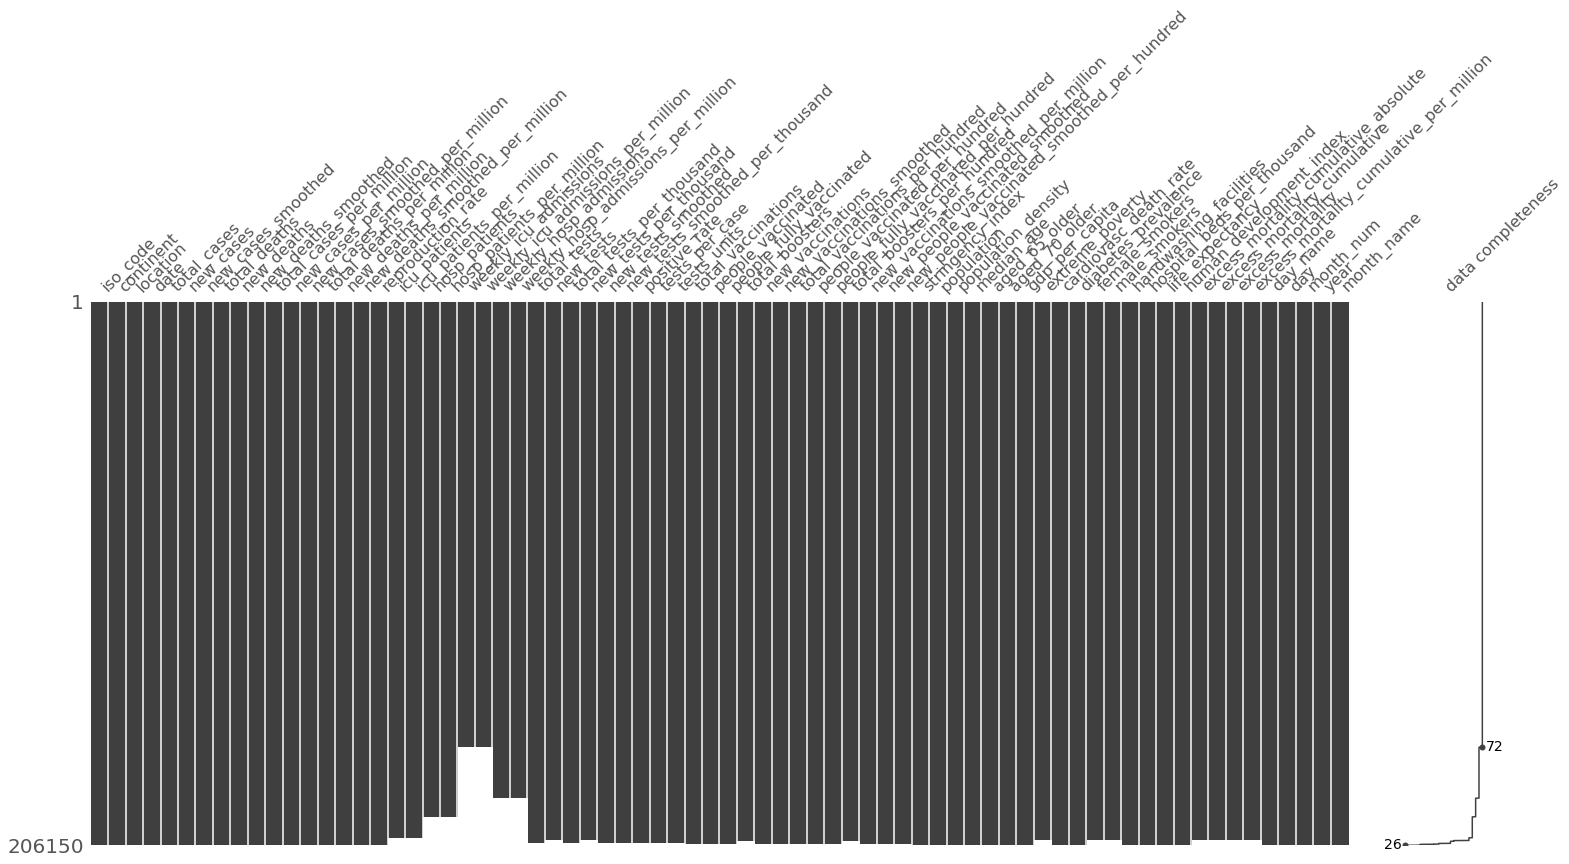

In [19]:
msno.matrix(df_filled, labels=True, sort='descending')

In [20]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.06150e+05  2.06150e+05         2.06145e+05   2.06122e+05   
mean   4.48818e+06  1.50123e+04         1.36868e+04   7.50276e+04   
std    2.47932e+07  8.92852e+04         8.46368e+04   3.59923e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.90925e+03  0.00000e+00         6.85700e+00   1.15000e+02   
50%    4.59275e+04  7.20000e+01         1.06571e+02   1.17000e+03   
75%    5.00147e+05  1.15400e+03         1.28529e+03   9.95900e+03   
max    5.80598e+08  4.07956e+06         3.43802e+06   6.40968e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  206122.00000         206117.00000             206150.00000   
mean      143.01676            135.86530              55074.08983   
std       720.08675            696.22212              97090.95324   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                994.79125   
50%         1.00000              1.57100               9724.88900   
75%        15.00000             15.85700              67770.84300   
max     18191.00000          14817.14300             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           206150.00000                    206145.00000   
mean               206.20639                       194.60761   
std                925.51055                       593.77791   
min                  0.00000                         0.00000   
25%                  0.00000                         1.61700   
50%                 10.62200                        21.42000   
75%                114.57950                       152.10600   
max             195005.31300                     35258.84300   

       total_deaths_per_million  new_deaths_per_million  \
count              206122.00000            206122.00000   
mean                  723.37584                 1.59788   
std                   989.99184                 5.92885   
min                     0.00000                 0.00000   
25%                    32.38900                 0.00000   
50%                   229.45850                 0.05100   
75%                  1102.25100                 1.11600   
max                  6360.01800               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                      206117.0000       206116.00000  203321.00000   
mean                            1.3958            0.94125     594.81229   
std                             3.2804            0.40898    1420.33557   
min                             0.0000           -0.05000       0.00000   
25%                             0.0000            0.74000      16.00000   
50%                             0.2130            0.97000      54.00000   
75%                             1.3560            1.17000     372.00000   
max                           148.6730            5.82000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              203321.00000   195365.00000               195365.00000   
mean                    9.56671     6495.68829                  140.90033   
std                    12.10825    11226.86022                  101.87033   
min                     0.00000        0.00000                    0.00000   
25%                     3.64300      311.00000                   81.41900   
50%                     5.69500     1016.00000                  116.91800   
75%                    13.60700     5569.00000                  164.08700   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           168970.00000                       168970.00000   
mean               131.04319                            4.70156   
std                218.46025                            6.13318   
min             

# Compute Pairwise Correlation

In [21]:
# compute the correlation matrix
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).describe().corr()
cor_mat

total_cases  new_cases  \
total_cases                                     1.00000    0.99833   
new_cases                                       0.99833    1.00000   
new_cases_smoothed                              0.99785    0.99996   
total_deaths                                    0.99950    0.99913   
new_deaths                                     -0.06372   -0.00947   
new_deaths_smoothed                            -0.08012   -0.02593   
total_cases_per_million                         0.95307    0.96475   
new_cases_per_million                           0.62329    0.66518   
new_cases_smoothed_per_million                  0.01972    0.07400   
total_deaths_per_million                       -0.12274   -0.06874   
new_deaths_per_million                         -0.14820   -0.09431   
new_deaths_smoothed_per_million                -0.15013   -0.09625   
reproduction_rate                              -0.15080   -0.09693   
icu_patients                                   -0.01044    0.04381   
icu_patients_per_million                       -0.14999   -0.09612   
hosp_patients                                   0.53884    0.58334   
hosp_patients_per_million                      -0.14358   -0.08965   
weekly_icu_admissions                          -0.12329   -0.06925   
weekly_icu_admissions_per_million              -0.14956   -0.09568   
weekly_hosp_admissions                          0.55555    0.59939   
weekly_hosp_admissions_per_million             -0.14771   -0.09381   
total_tests                                     0.99994    0.99858   
new_tests                                       0.99924    0.99899   
total_tests_per_thousand                        0.00593    0.06008   
new_tests_per_thousand                         -0.14828   -0.09439   
new_tests_smoothed                              0.99973    0.99821   
new_tests_smoothed_per_thousand                -0.15013   -0.09625   
positive_rate                                  -0.15082   -0.09695   
tests_per_case                                  0.97854    0.98842   
total_vaccinations                              0.99948    0.99680   
people_vaccinated                               0.99940    0.99664   
people_fully_vaccinated                         0.99938    0.99661   
total_boosters                                  0.99907    0.99605   
new_vaccinations                                0.99999    0.99859   
new_vaccinations_smoothed                       0.99999    0.99853   
total_vaccinations_per_hundred                 -0.14947   -0.09558   
people_vaccinated_per_hundred                  -0.15040   -0.09652   
people_fully_vaccinated_per_hundred            -0.15039   -0.09651   
total_boosters_per_hundred                     -0.15029   -0.09641   
new_vaccinations_smoothed_per_million           0.38847    0.43801   
new_people_vaccinated_smoothed                  0.99992    0.99897   
new_people_vaccinated_smoothed_per_hundred     -0.15077   -0.09690   
stringency_index                               -0.15051   -0.09664   
population                                      0.99902    0.99593   
population_density                             -0.05339    0.00076   
median_age                                     -0.15072   -0.09684   
aged_65_older                                  -0.15073   -0.09686   
aged_70_older                                  -0.15076   -0.09689   
gdp_per_capita                                  0.35896    0.40813   
extreme_poverty                                -0.15050   -0.09663   
cardiovasc_death_rate                          -0.14837   -0.09447   
diabetes_prevalence                            -0.15071   -0.09684   
female_smokers                                 -0.15066   -0.09678   
male_smokers                                   -0.15057   -0.09670   
handwashing_facilities                         -0.15053   -0.09666   
hospital_beds_per_thousand                     -0.15077   -0.09690   
life_expectancy                                -0.1507

In [22]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
new_tests_smoothed                            0.99978
new_people_vaccinated_smoothed                0.99965
new_vaccinations_smoothed                     0.99962
new_vaccinations                              0.99957
total_cases                                   0.99950
total_tests                                   0.99936
total_vaccinations                            0.99919
new_cases                                     0.99913
people_vaccinated                             0.99912
people_fully_vaccinated                       0.99911
new_cases_smoothed                            0.99894
total_boosters                                0.99885
population                                    0.99879
new_tests                                     0.99863
excess_mortality_cumulative_absolute          0.98778
tests_per_case                                0.98370
total_cases_per_million                       0.96163
new_cases_per_million       

<AxesSubplot:title={'center':'Unique values per column'}>

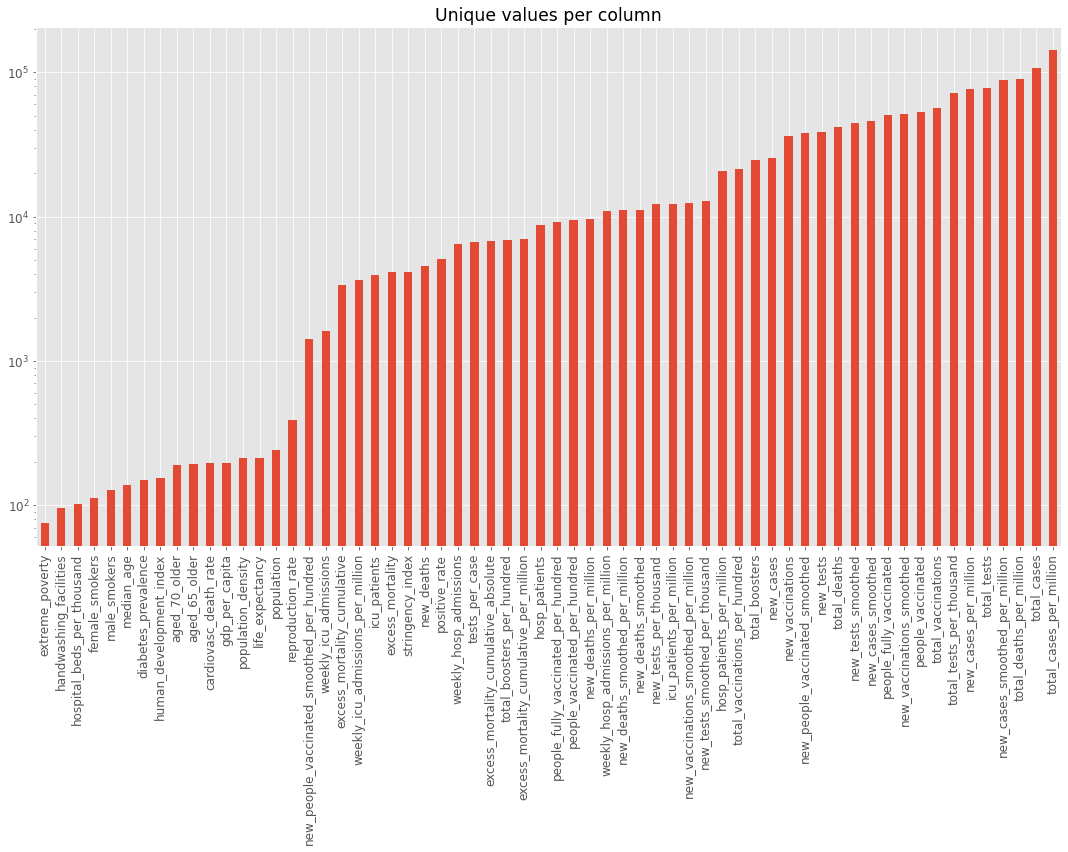

In [23]:
# get the unique values for each numerical column
unique_values = df_filled.drop(columns=['date', 'day', 'month_num', 'month_name', 'year']).select_dtypes(include='number').nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 12), title='Unique values per column')

<AxesSubplot:title={'center':'Percentage of missing values per column'}, xlabel='Column Name', ylabel='Ration of missing values per column'>

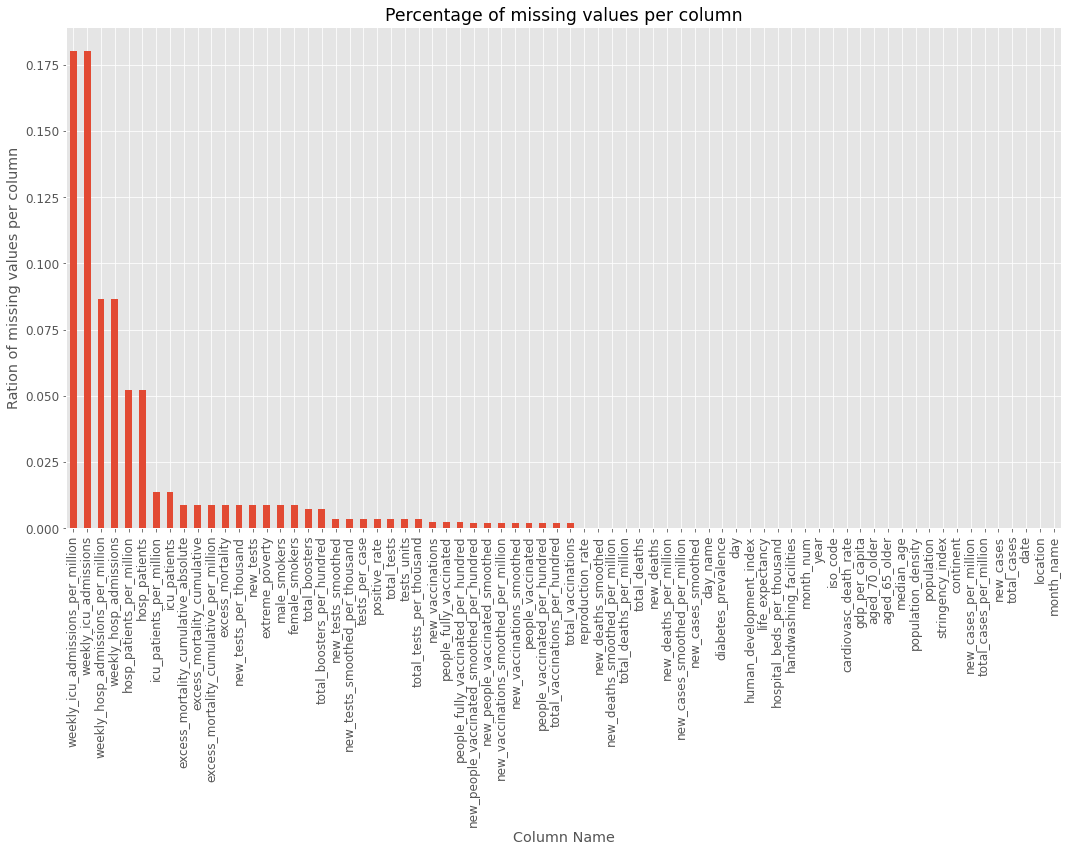

In [24]:
df_filled.isna().mean().sort_values(ascending=False).plot(
  kind='bar', figsize=(15, 12),
  title='Percentage of missing values per column',
  xlabel='Column Name', ylabel='Ration of missing values per column'
)

# Check Duplication

In [25]:
df_filled.duplicated().sum()

0

In [26]:
df_filled.describe(exclude='number')

iso_code continent   location                 date      tests_units  \
count    206150    206150     206150               206150           205445   
unique      244         6        244                  946                4   
top         ARG    Africa  Argentina  2021-09-01 00:00:00  tests performed   
freq        946     51390        946                  243           150821   
first       NaN       NaN        NaN  2020-01-01 00:00:00              NaN   
last        NaN       NaN        NaN  2022-08-03 00:00:00              NaN   

         day_name month_name  
count      206150     206150  
unique          7         12  
top     Wednesday        May  
freq        29549      21595  
first         NaN        NaN  
last          NaN        NaN

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [27]:
from matplotlib.ticker import FuncFormatter

# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)


# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [28]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0                 NaN                    0.125                  0.125   
1                 NaN                    0.125                  0.000   
2                 NaN                    0.125                  0.000   
3                 NaN                    0.125                  0.000   
4                 NaN                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                             NaN  2020          2        Feb   24     Monday  
1                             NaN  2020          2        Feb   25    Tuesday  
2                             NaN  2020          2        Feb   26  Wednesday  
3                             NaN  2020          2        Feb   27   Thursday  
4                             NaN  2020          2        Feb   28     Friday

In [29]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  2.06150e+05  2.06150e+05         2.06145e+05             206150.00000   
mean   4.48818e+06  1.50123e+04         1.36868e+04              55074.08983   
std    2.47932e+07  8.92852e+04         8.46368e+04              97090.95324   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.90925e+03  0.00000e+00         6.85700e+00                994.79125   
50%    4.59275e+04  7.20000e+01         1.06571e+02               9724.88900   
75%    5.00147e+05  1.15400e+03         1.28529e+03              67770.84300   
max    5.80598e+08  4.07956e+06         3.43802e+06             655309.33300   

       new_cases_per_million  new_cases_smoothed_per_million  
count           206150.00000                    206145.00000  
mean               206.20639                       194.60761  
std                925.51055                       593.77791  
min                  0.00000                         0.00000  
25%                  0.00000                         1.61700  
50%                 10.62200                        21.42000  
75%                114.57950                       152.10600  
max             195005.31300                     35258.84300

In [30]:
df_cases.isna().sum()                                   # check missing values

iso_code                          0
continent                         0
location                          0
date                              0
total_cases                       0
new_cases                         0
new_cases_smoothed                5
total_cases_per_million           0
new_cases_per_million             0
new_cases_smoothed_per_million    5
year                              0
month_num                         0
month_name                        0
day                               0
day_name                          0
dtype: int64

<AxesSubplot:>

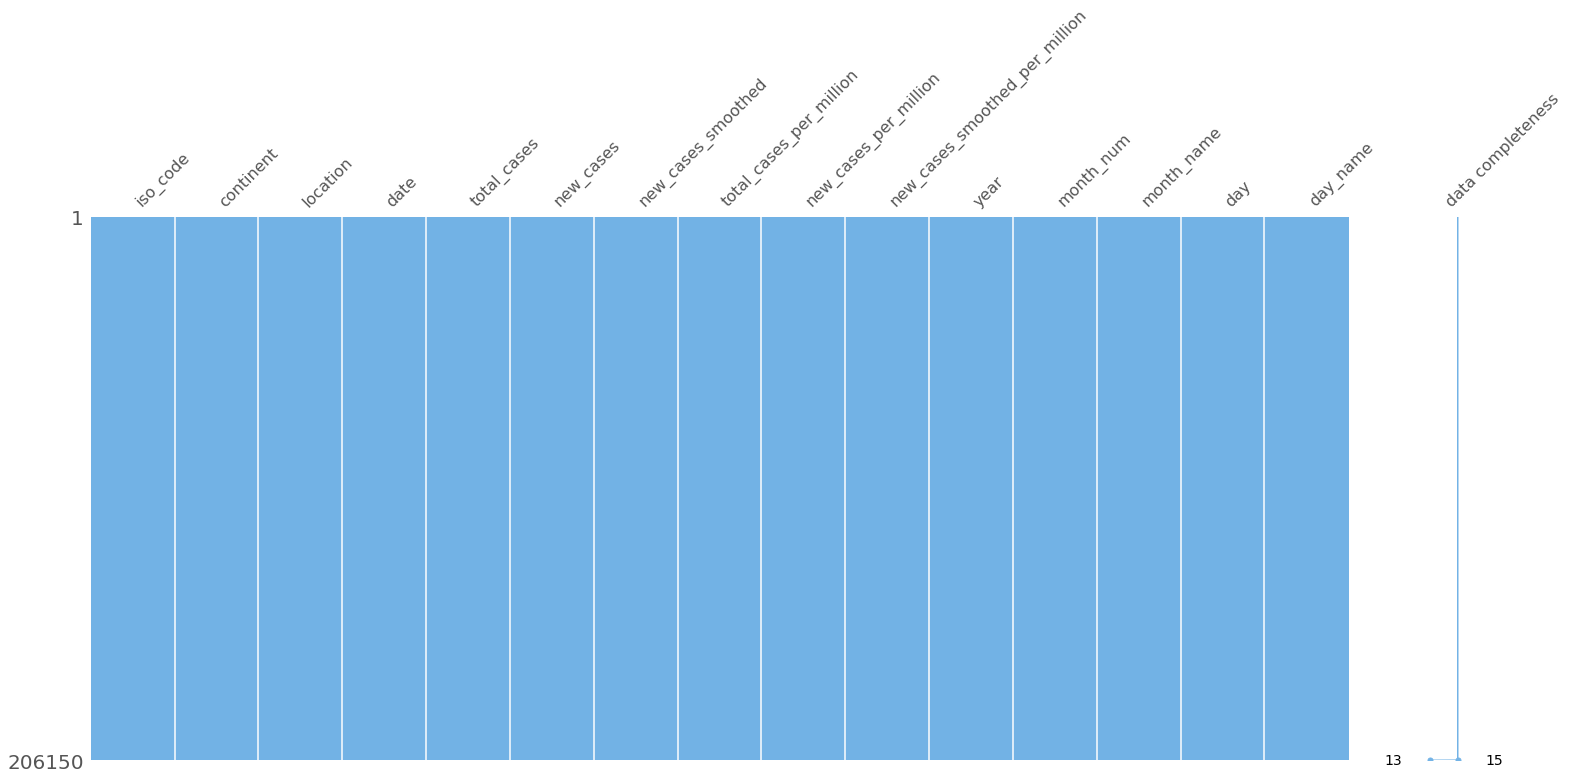

In [31]:
msno.matrix(df_cases, labels=True, sort='descending', color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

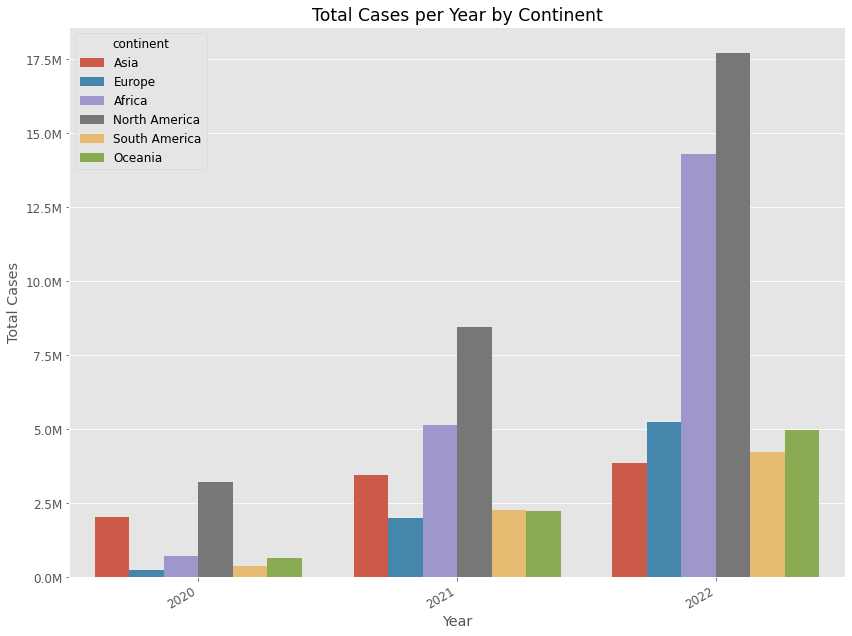

In [32]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', 
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

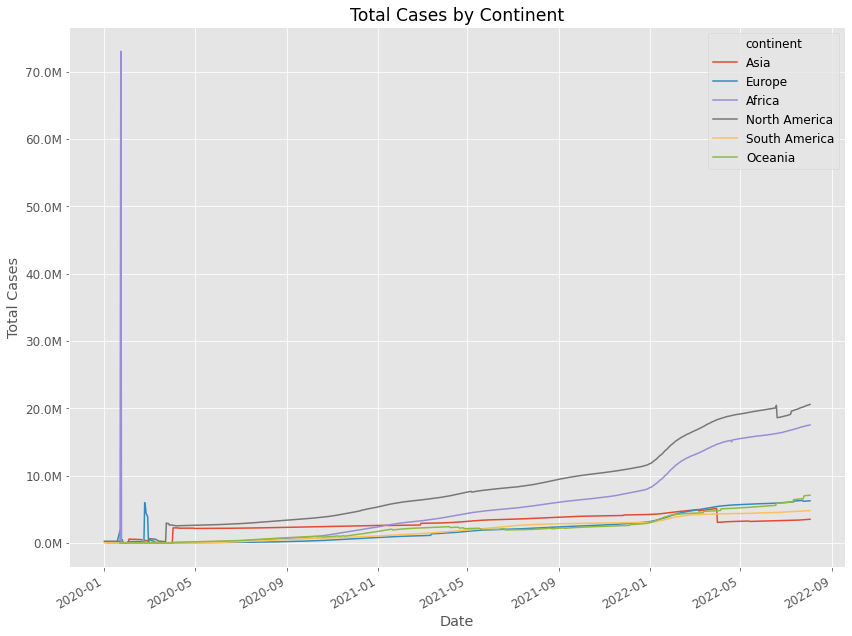

In [33]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

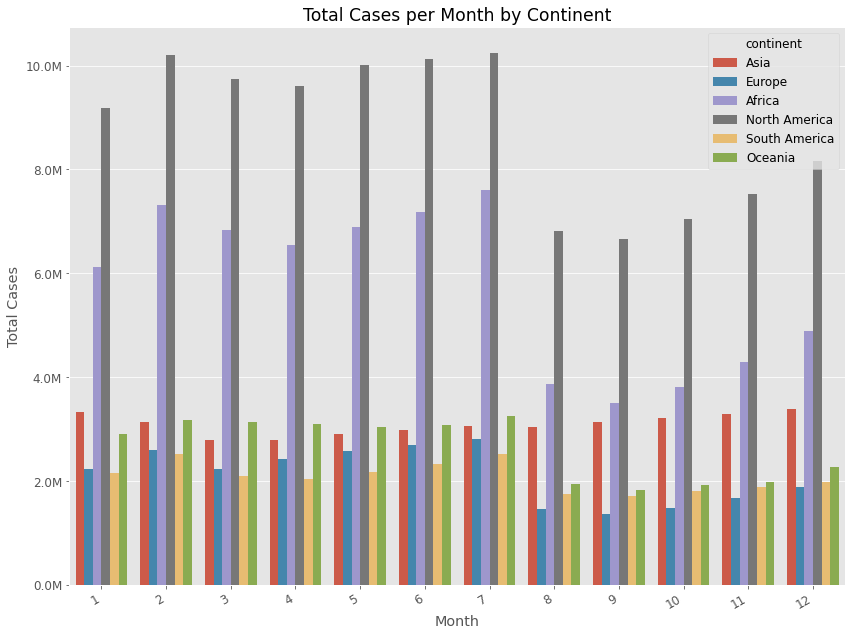

In [34]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

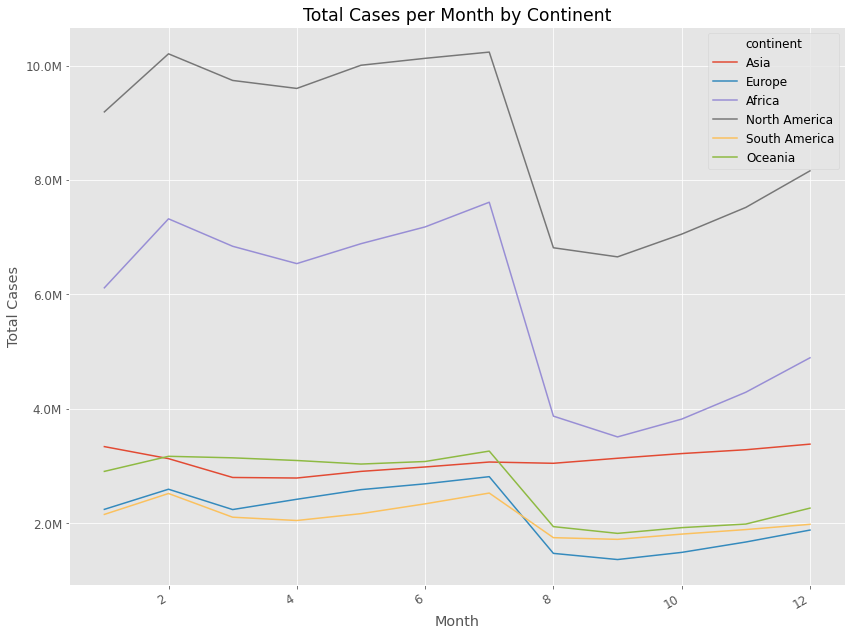

In [35]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

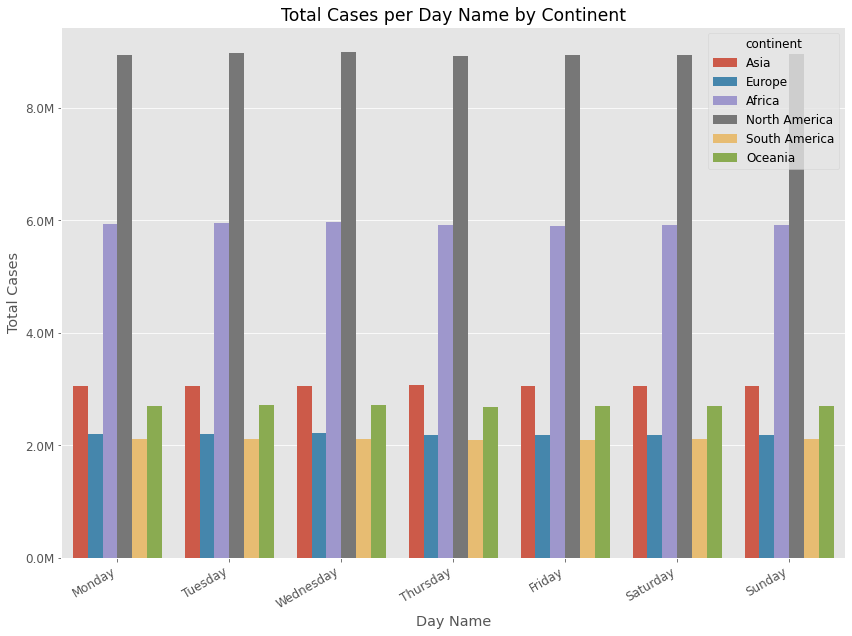

In [36]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', 
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

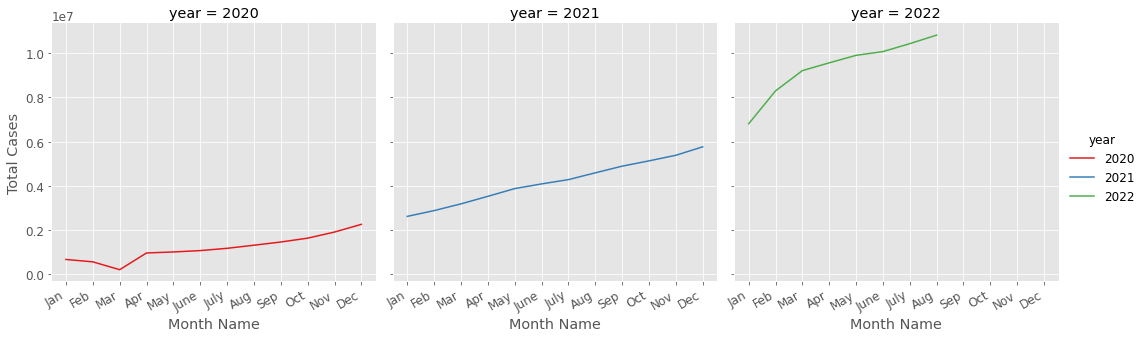

In [37]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='Set1',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()

# Deaths Exploration

In [38]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24           NaN         NaN   
1      AFG      Asia  Afghanistan 2020-02-25           NaN         NaN   
2      AFG      Asia  Afghanistan 2020-02-26           NaN         NaN   
3      AFG      Asia  Afghanistan 2020-02-27           NaN         NaN   
4      AFG      Asia  Afghanistan 2020-02-28           NaN         NaN   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0                  NaN                       NaN                     NaN   
1                  NaN                       NaN                     NaN   
2                  NaN                       NaN                     NaN   
3                  NaN                       NaN                     NaN   
4                  NaN                       NaN                     NaN   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                              NaN  2020          2        Feb   24     Monday  
1                              NaN  2020          2        Feb   25    Tuesday  
2                              NaN  2020          2        Feb   26  Wednesday  
3                              NaN  2020          2        Feb   27   Thursday  
4                              NaN  2020          2        Feb   28     Friday

In [39]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   2.06122e+05  206122.00000         206117.00000   
mean    7.50276e+04     143.01676            135.86530   
std     3.59923e+05     720.08675            696.22212   
min     1.00000e+00       0.00000              0.00000   
25%     1.15000e+02       0.00000              0.00000   
50%     1.17000e+03       1.00000              1.57100   
75%     9.95900e+03      15.00000             15.85700   
max     6.40968e+06   18191.00000          14817.14300   

       total_deaths_per_million  new_deaths_per_million  \
count              206122.00000            206122.00000   
mean                  723.37584                 1.59788   
std                   989.99184                 5.92885   
min                     0.00000                 0.00000   
25%                    32.38900                 0.00000   
50%                   229.45850                 0.05100   
75%                  1102.25100                 1.11600   
max                  6360.01800               553.80300   

       new_deaths_smoothed_per_million  
count                      206117.0000  
mean                            1.3958  
std                             3.2804  
min                             0.0000  
25%                             0.0000  
50%                             0.2130  
75%                             1.3560  
max                           148.6730

In [40]:
df_deaths.isna().sum()                                   # check missing values

iso_code                            0
continent                           0
location                            0
date                                0
total_deaths                       28
new_deaths                         28
new_deaths_smoothed                33
total_deaths_per_million           28
new_deaths_per_million             28
new_deaths_smoothed_per_million    33
year                                0
month_num                           0
month_name                          0
day                                 0
day_name                            0
dtype: int64

<AxesSubplot:>

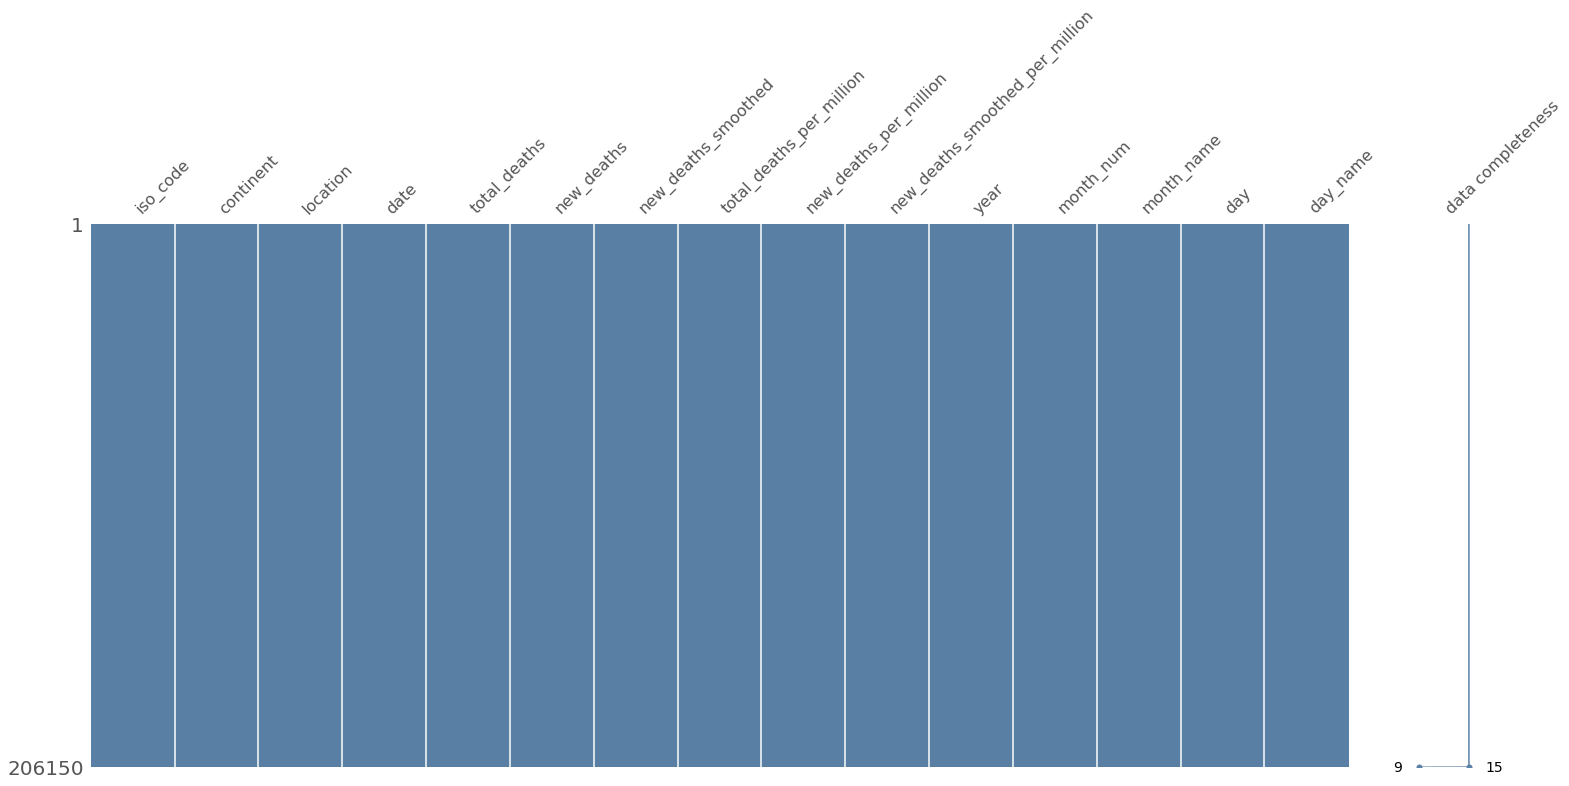

In [41]:
msno.matrix(df_deaths, labels=True, sort='descending', color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

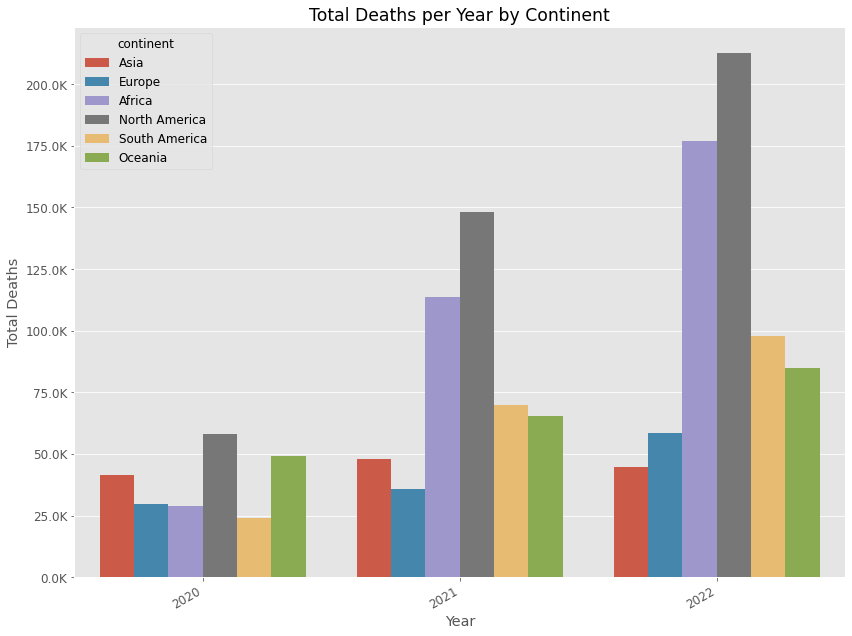

In [42]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

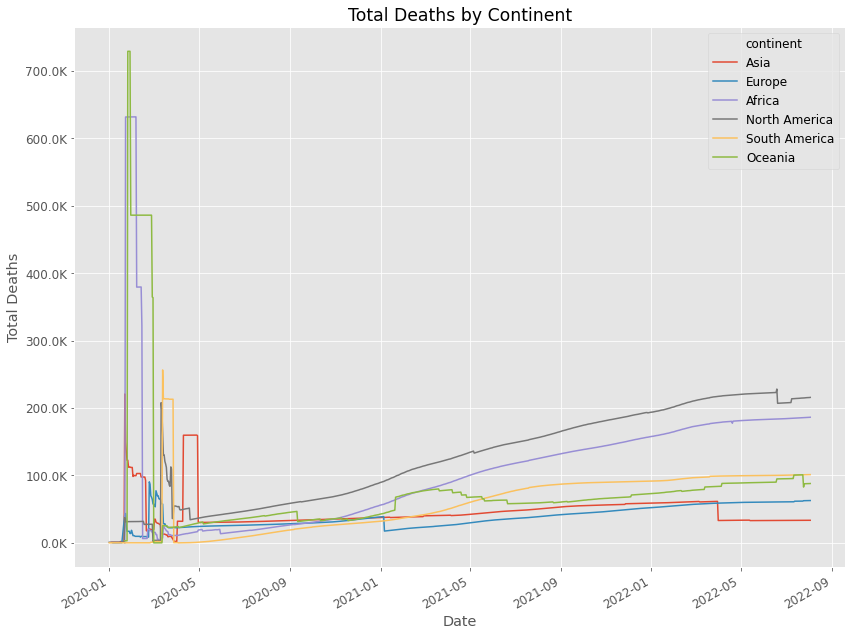

In [43]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', 
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

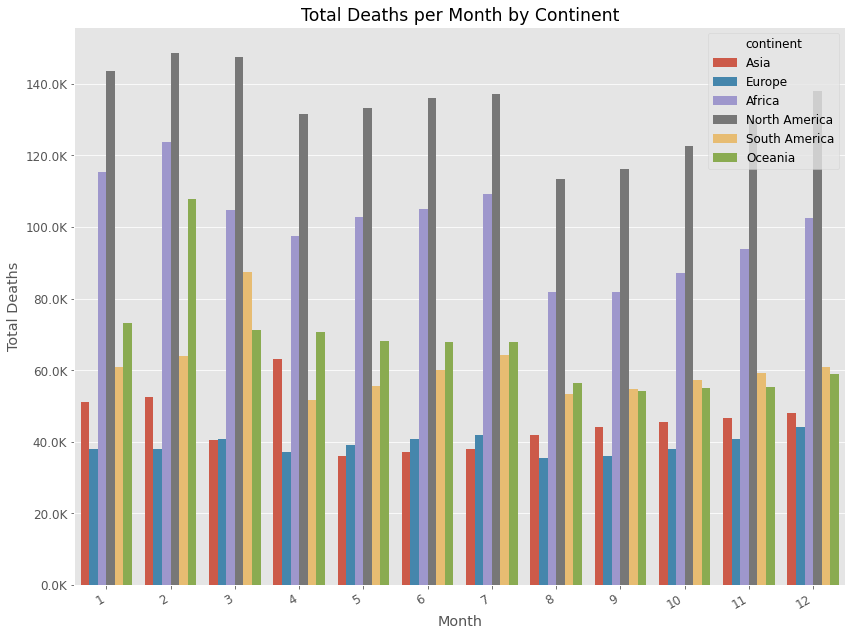

In [44]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

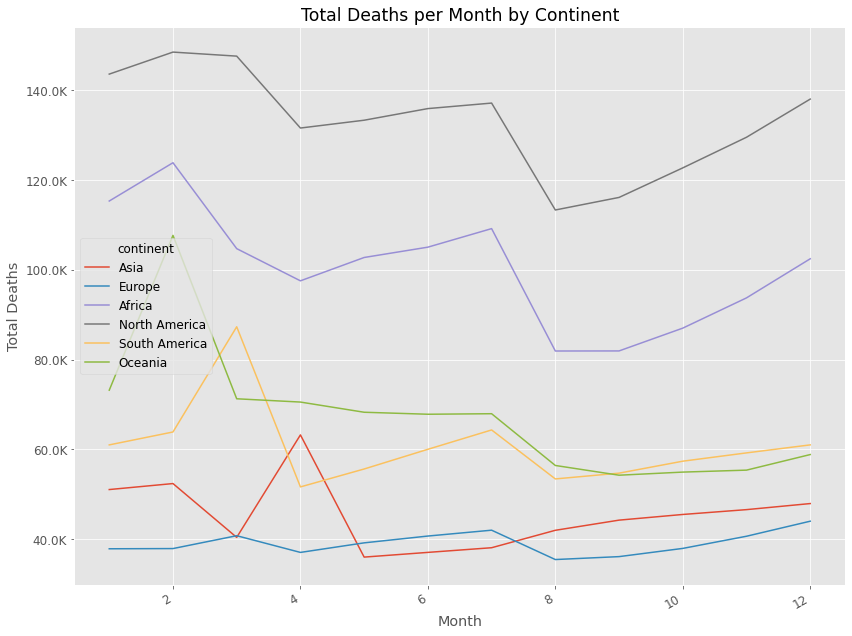

In [45]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

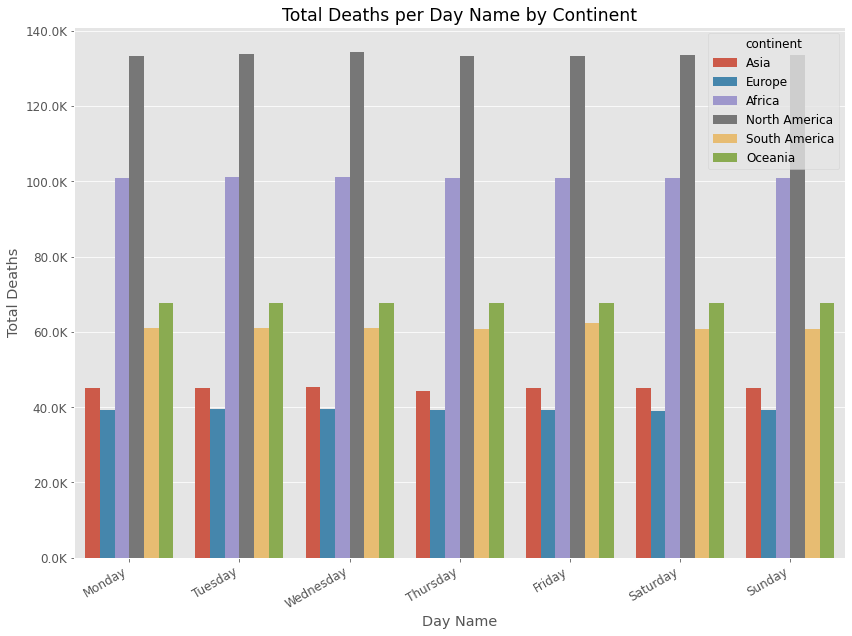

In [46]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', 
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

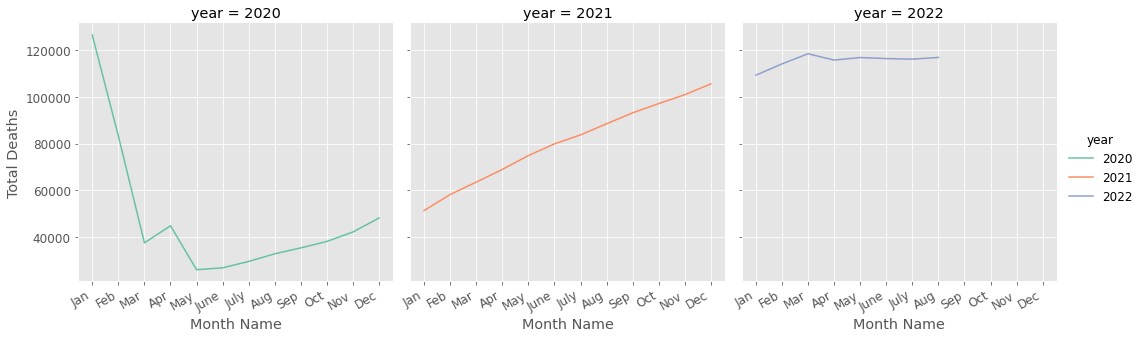

In [47]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='Set2',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [48]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN          NaN   
1      AFG      Asia  Afghanistan 2020-02-25        NaN          NaN   
2      AFG      Asia  Afghanistan 2020-02-26        NaN          NaN   
3      AFG      Asia  Afghanistan 2020-02-27        NaN          NaN   
4      AFG      Asia  Afghanistan 2020-02-28        NaN          NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                              NaN            NaN             NaN         NaN   
1                              NaN            NaN             NaN         NaN   
2                              NaN            NaN             NaN         NaN   
3                              NaN            NaN             NaN         NaN   
4                              NaN            NaN             NaN         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [49]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  2.04355e+05  2.05445e+05              205445.00000   
mean   3.77504e+04  3.02193e+07                1210.28794   
std    1.58344e+05  2.97711e+08                2625.07371   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    1.35100e+03  3.09732e+05                  52.63500   
50%    4.11800e+03  2.52467e+06                 334.20000   
75%    1.92440e+04  1.09190e+07                1407.83500   
max    3.58556e+07  9.21400e+09               32925.90000   

       new_tests_per_thousand  new_tests_smoothed  \
count            204355.00000         2.05438e+05   
mean                  2.54208         9.67232e+04   
std                   8.16503         9.38022e+05   
min                   0.00000         0.00000e+00   
25%                   0.21200         6.83000e+02   
50%                   0.62800         3.66900e+03   
75%                   2.01200         1.80548e+04   
max                 534.01300         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     205438.00000   205438.00000     2.05438e+05  
mean                           2.15515        0.14181     1.19545e+03  
std                            5.99240        0.18348     2.27117e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.14600        0.01700     4.90000e+00  
50%                            0.56700        0.07900     1.21000e+01  
75%                            2.01800        0.19400     4.84000e+01  
max                          147.60300        1.00000     1.02363e+06

In [50]:
df_test.isna().sum()                                   # check missing values

iso_code                              0
continent                             0
location                              0
date                                  0
new_tests                          1795
total_tests                         705
total_tests_per_thousand            705
new_tests_per_thousand             1795
new_tests_smoothed                  712
new_tests_smoothed_per_thousand     712
positive_rate                       712
tests_per_case                      712
tests_units                         705
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

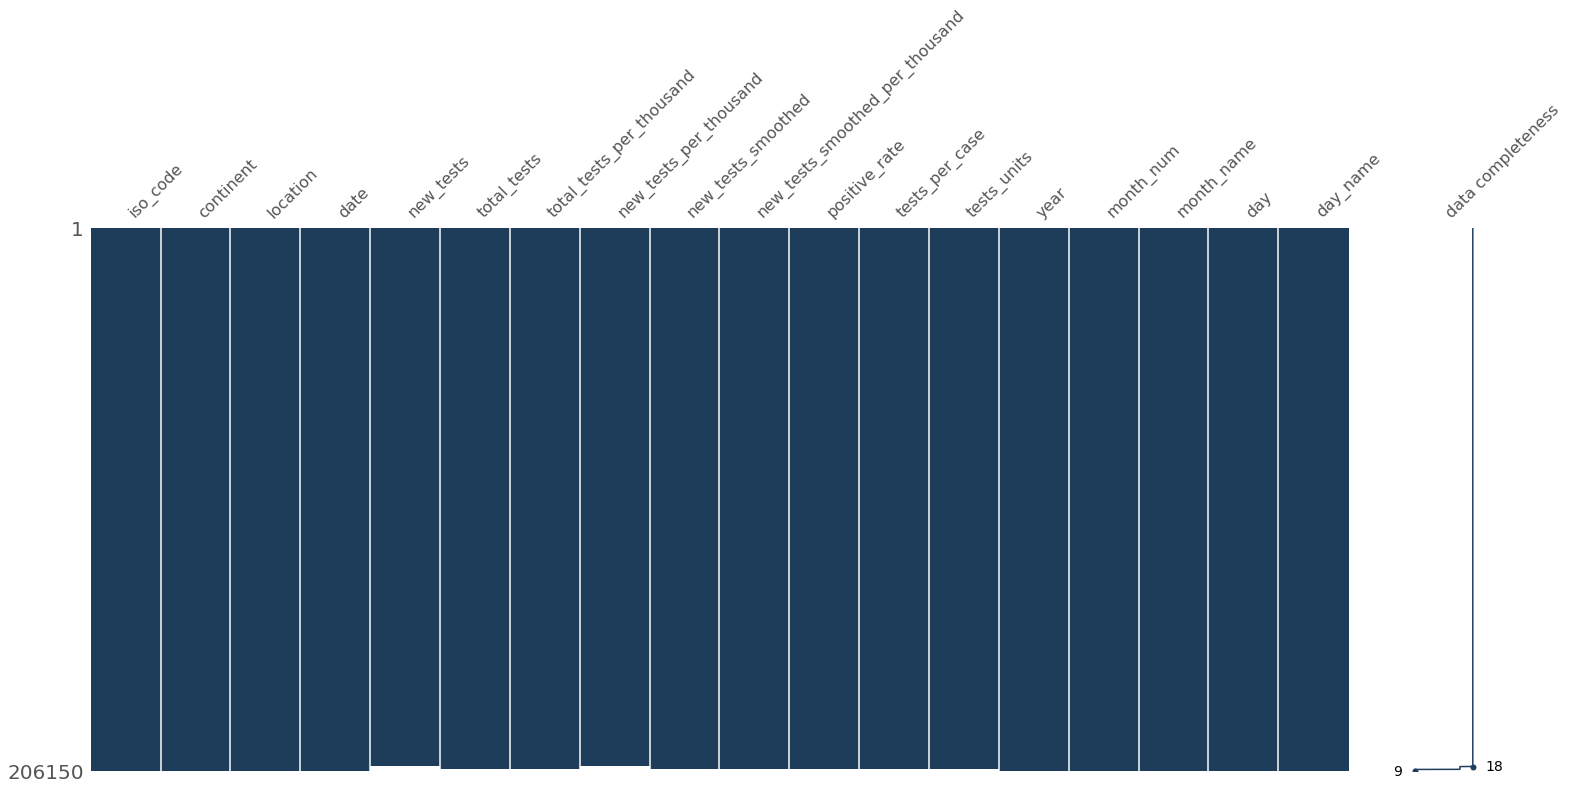

In [51]:
msno.matrix(df_test, labels=True, sort='descending', color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

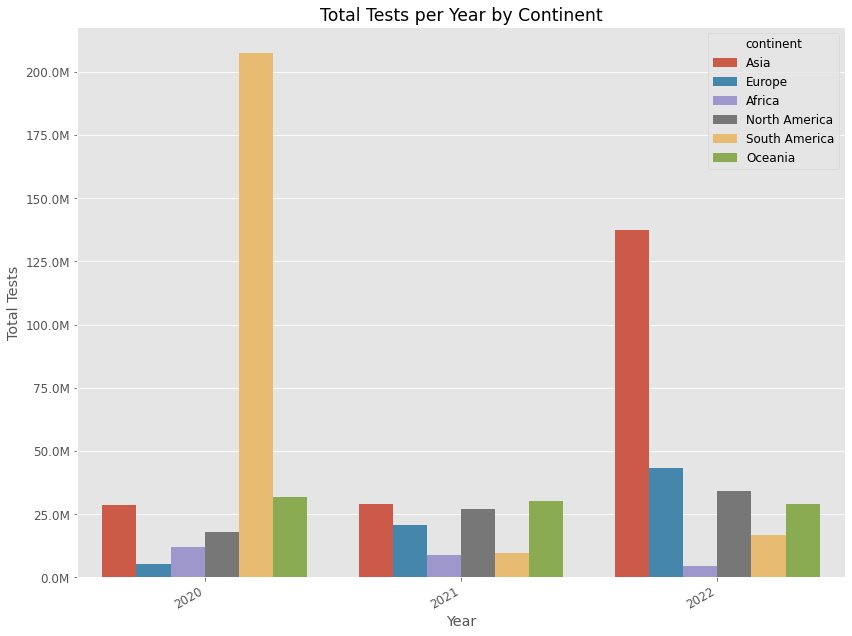

In [52]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', 
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

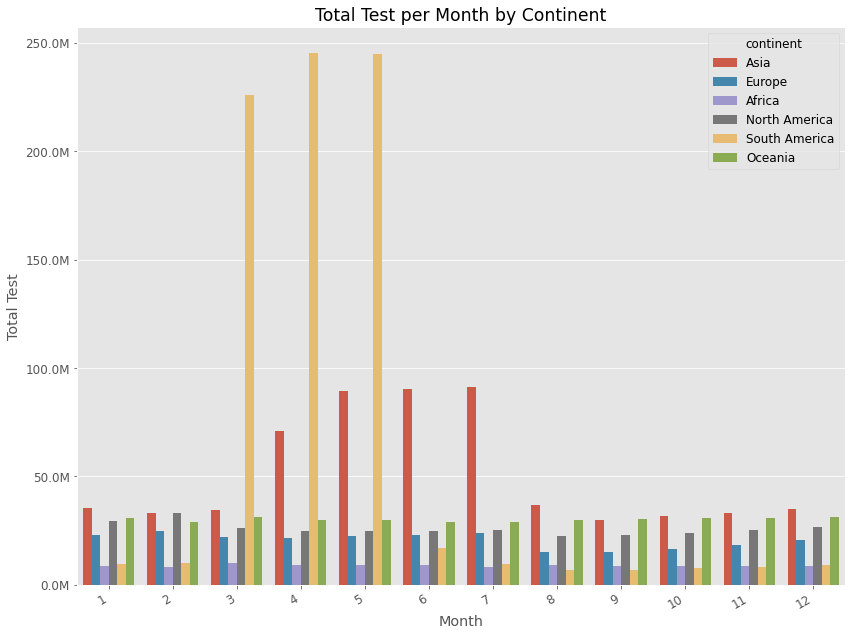

In [53]:
plot_bar(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

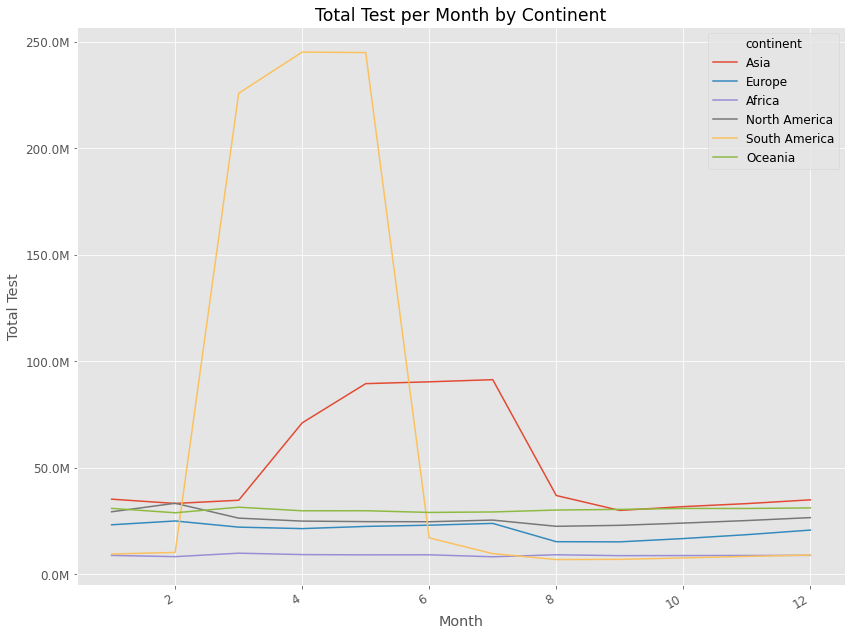

In [54]:
plot_line(
    data=df_test,
    x='month_num', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

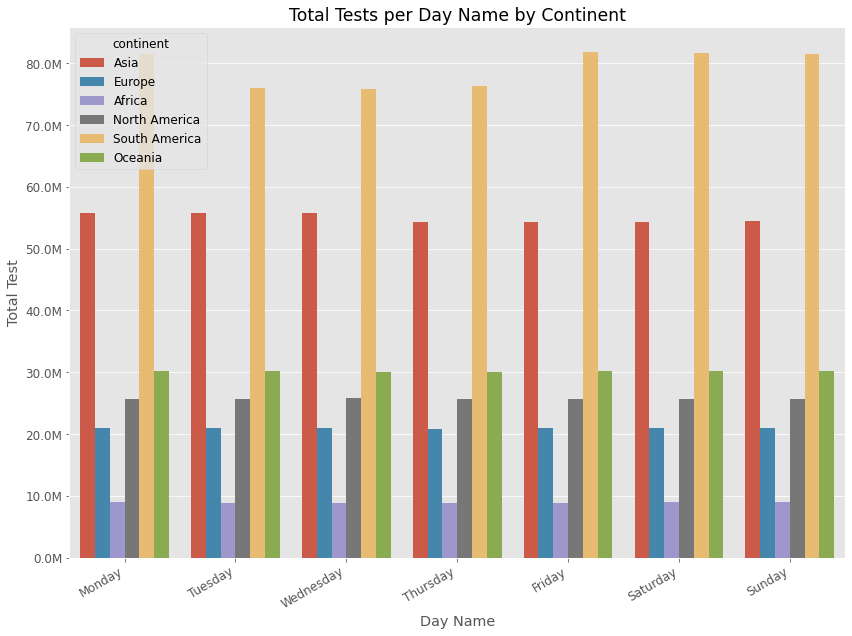

In [55]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', 
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

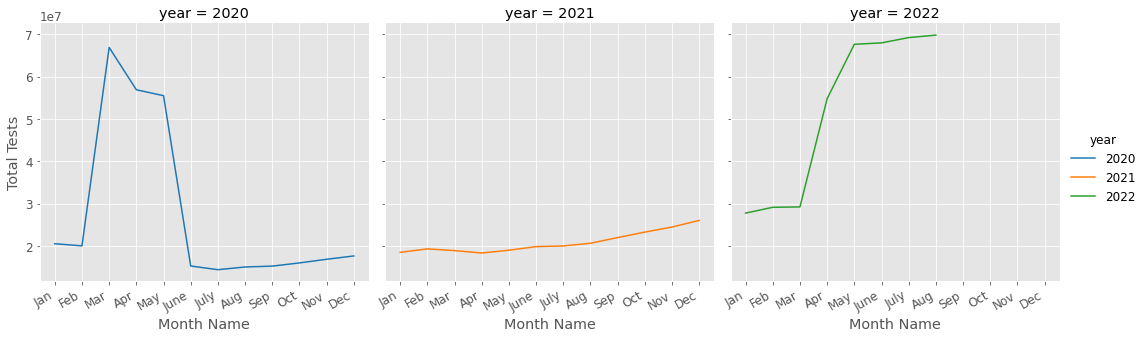

In [56]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [57]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24                 NaN   
1      AFG      Asia  Afghanistan 2020-02-25                 NaN   
2      AFG      Asia  Afghanistan 2020-02-26                 NaN   
3      AFG      Asia  Afghanistan 2020-02-27                 NaN   
4      AFG      Asia  Afghanistan 2020-02-28                 NaN   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0                NaN                      NaN             NaN   
1                NaN                      NaN             NaN   
2                NaN                      NaN             NaN   
3                NaN                      NaN             NaN   
4                NaN                      NaN             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0               NaN                        NaN   
1               NaN                        NaN   
2               NaN                        NaN   
3               NaN                        NaN   
4               NaN                        NaN   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             NaN                            NaN   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                                  NaN                         NaN   
1                                  NaN                         NaN   
2                                  NaN                         NaN   
3                                  NaN                         NaN   
4                                  NaN                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                                    NaN                             NaN   
1                                    NaN                             NaN   
2                                    NaN                             NaN   
3                                    NaN                             NaN   
4                                    NaN                             NaN   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                         NaN  2020          2        Feb   
1                                         NaN  2020          2        Feb   
2                                         NaN  2020          2        Feb   
3                                         NaN  2020          2        Feb   
4                                         NaN  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [58]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         2.05786e+05        2.05786e+05              2.05708e+05   
mean          1.70864e+08        7.73834e+07              7.01674e+07   
std           9.31555e+08        4.12724e+08              3.81843e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           2.96866e+05        1.72232e+05              1.55555e+05   
50%           2.79232e+06        1.63523e+06              1.33528e+06   
75%           1.98835e+07        9.74008e+06              8.89923e+06   
max           1.23630e+10        5.30320e+09              4.87214e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     2.04635e+05       2.05692e+05                2.05785e+05   
mean      3.76561e+07       3.48915e+05                2.97822e+05   
std       1.96902e+08       2.00574e+06                1.90243e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       4.21830e+04       8.66000e+02                1.96000e+02   
50%       7.41197e+05       9.00600e+03                3.68300e+03   
75%       6.60946e+06       7.47090e+04                3.65360e+04   
max       2.27694e+09       4.96737e+07                4.36889e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    205786.00000                   205786.00000   
mean                        105.85782                       48.63580   
std                          79.61995                       30.20582   
min                           0.00000                        0.00000   
25%                          28.96000                       19.43000   
50%                         102.94000                       53.97000   
75%                         167.86000                       74.39000   
max                         366.87000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         205708.00000                204635.00000   
mean                              45.02632                    28.40322   
std                               28.88123                    25.06299   
min                                0.00000                     0.00000   
25%                               17.27000                     4.61000   
50%                               48.00000                    25.70000   
75%                               68.61000                    47.26000   
max                              126.79000                   133.86000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           205785.00000                     2.05785e+05   
mean                              2078.96806                     1.00085e+05   
std                               3386.00956                     7.59416e+05   
min                                  0.00000                     0.00000e+00   
25%                                191.00000                     5.00000e+01   
50%                                784.00000                     8.51000e+02   
75%                               2601.00000                     1.08310e+04   
max                             117862.00000                     2.10699e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                205785.00000  
mean                                      0.08018  
std                                       0.17626  
min                                       0.00000  
25%                                       0.00300  
50%                                       0.01700  
75%                                       0.08100  
max                                      11.78600

In [59]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                         0
continent                                        0
location                                         0
date                                             0
total_vaccinations                             364
people_vaccinated                              364
people_fully_vaccinated                        442
total_boosters                                1515
new_vaccinations                               458
new_vaccinations_smoothed                      365
total_vaccinations_per_hundred                 364
people_vaccinated_per_hundred                  364
people_fully_vaccinated_per_hundred            442
total_boosters_per_hundred                    1515
new_vaccinations_smoothed_per_million          365
new_people_vaccinated_smoothed                 365
new_people_vaccinated_smoothed_per_hundred     365
year                                             0
month_num                                        0
month_name                     

<AxesSubplot:>

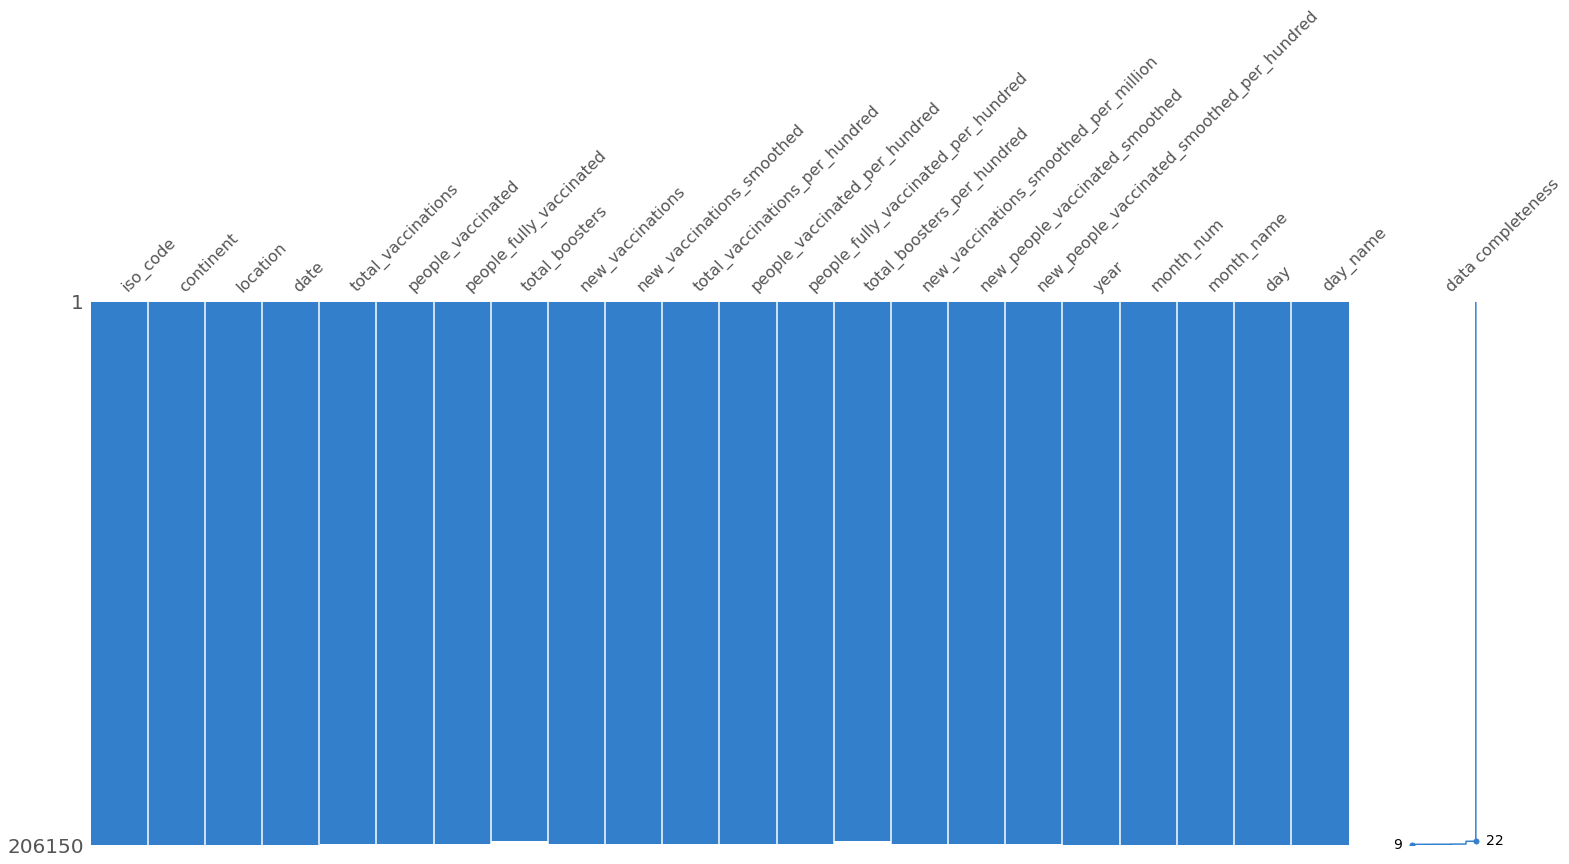

In [60]:
msno.matrix(df_vacc, labels=True, sort='descending', color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

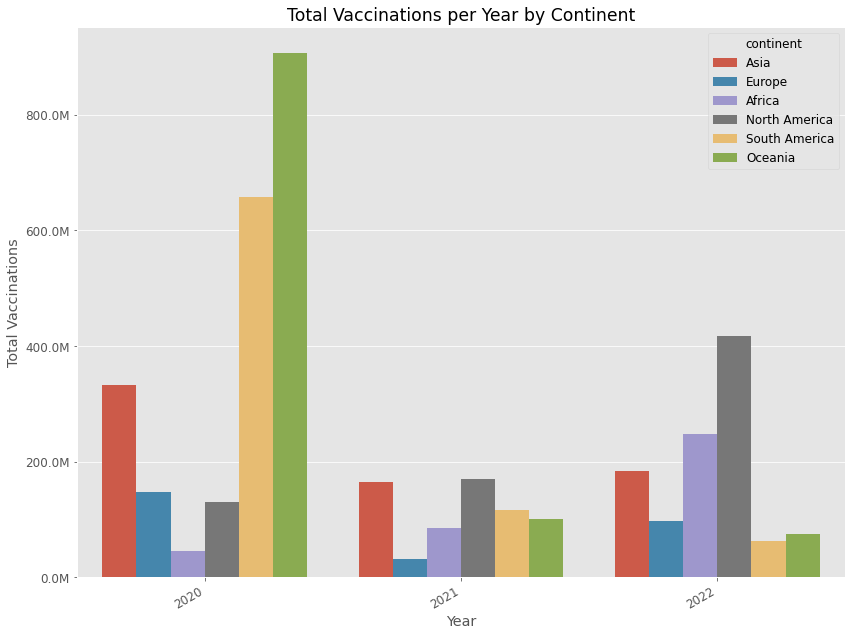

In [61]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

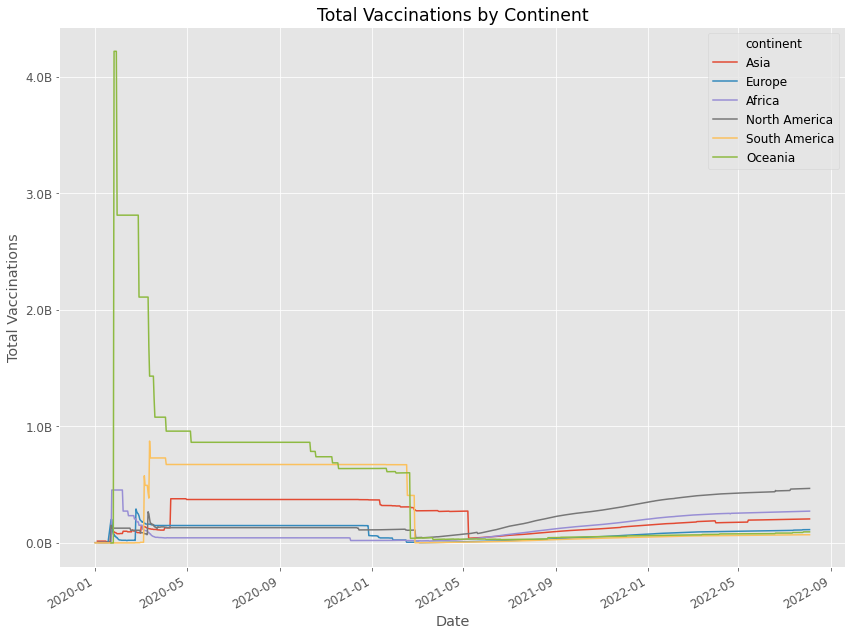

In [62]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

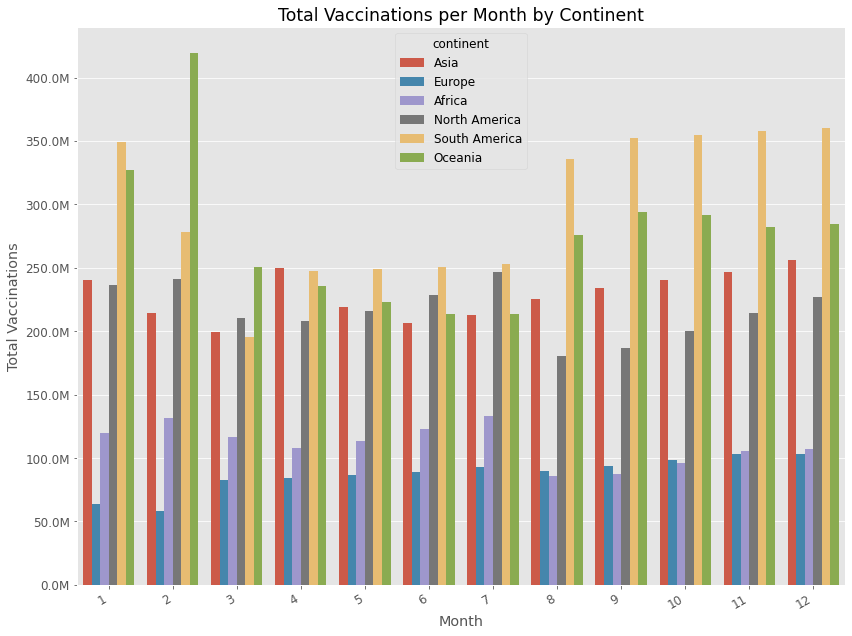

In [63]:
plot_bar(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

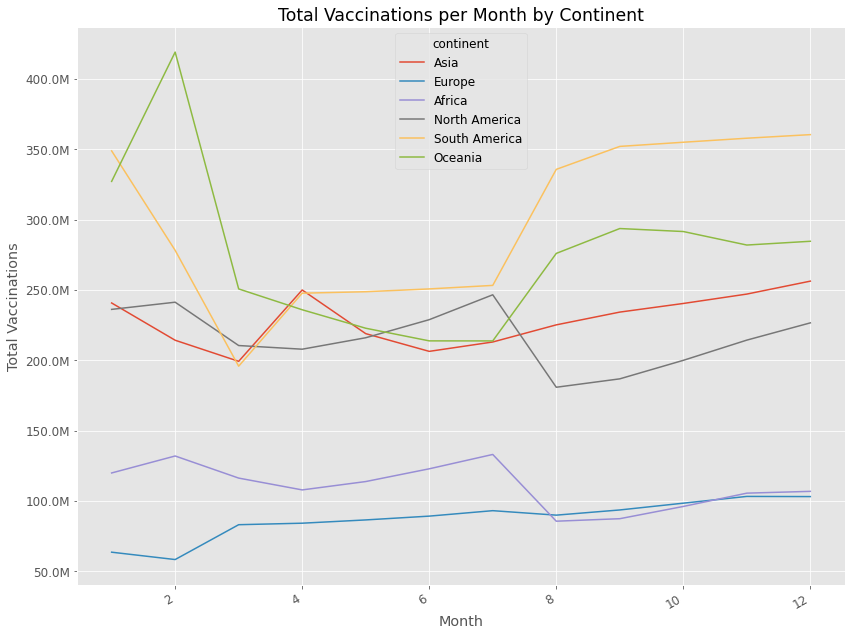

In [64]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

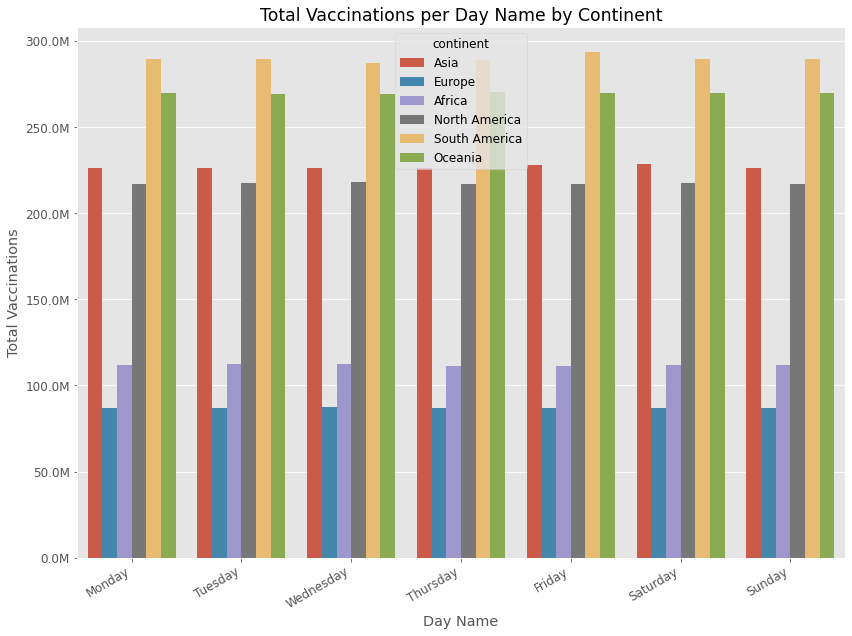

In [65]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

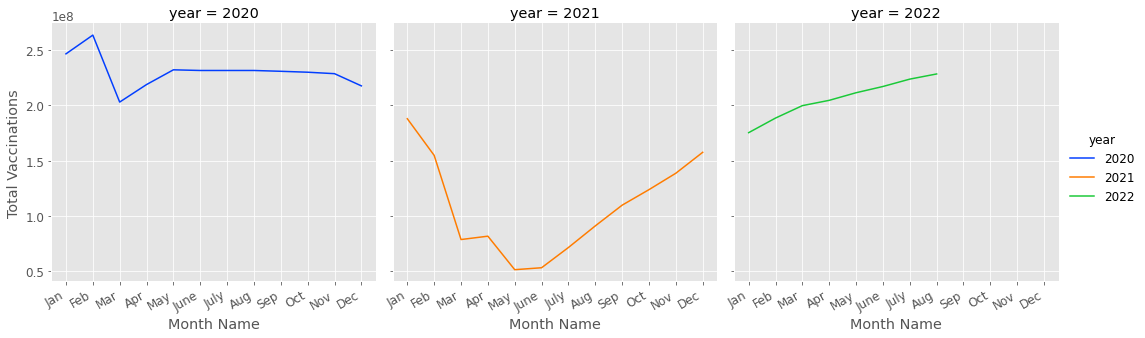

In [66]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [67]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [68]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.06150e+05        206150.00000  206150.00000   206150.00000   
mean   1.43594e+08           426.83929      30.35261        8.77790   
std    6.94192e+08          1992.27202       9.10577        6.17066   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.96007e+05            39.49700      22.00000        3.52600   
50%    7.49458e+06            93.10500      29.40000        6.29300   
75%    3.35739e+07           222.87300      39.10000       13.92800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   206150.00000    206150.00000     204355.00000           206150.00000   
mean         5.46722     19657.46559         13.75817              262.84328   
std          4.16225     20420.30988         19.86404              121.49472   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              176.69000   
50%          3.83300     13111.21400          2.00000              243.81100   
75%          8.62200     28763.07100         22.50000              341.01000   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         206150.00000    204355.00000  204355.00000   
mean               8.24152        11.56047      31.60524   
std                4.60083        11.36483      13.93358   
min                0.99000         0.10000       7.70000   
25%                5.31000         1.90000      21.00000   
50%                7.17000         6.40000      30.20000   
75%               10.43000        20.10000      40.80000   
max               30.53000        44.00000      78.10000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count            206150.00000                206150.00000     206150.00000   
mean                 48.39362                     3.05704         73.56127   
std                  32.29195                     2.54730          7.38709   
min                   1.18800                     0.10000         53.28000   
25%                  19.35100                     1.30000         68.37000   
50%                  43.99300                     2.40000         75.05000   
75%                  79.80700                     4.20000         78.95000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             206150.00000                           2.04351e+05   
mean                   0.72253                           5.78766e+04   
std                    0.15029                           1.77190e+05   
min                    0.39400                          -3.77261e+04   
25%                    0.59400                           1.73000e+02   
50%                    0.74000                           5.29770e+03   
75%                    0.84500                           4.02686e+04   
max                    0.95700                           1.21908e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 204351.00000      204351.00000   
mean                      13.40318          13.90566   
std                       12.80777          26.57323   
min                      -28.45000         -95.92000   
25%                        4.05000          -1.44000   
50%                       10.30000           8.71000   
75%                       22.24000          20.33000   
max                       76.55000         375.98000   

       excess_mortality_cumulative_per_million  
count                             204351.00000  
mean                                1840.82427  
std                                 2144.35213  
min                                -1694.14612  
25% 

In [69]:
df_demo.isna().sum()                                   # check missing values

iso_code                                      0
continent                                     0
location                                      0
date                                          0
population                                    0
population_density                            0
median_age                                    0
aged_65_older                                 0
aged_70_older                                 0
gdp_per_capita                                0
extreme_poverty                            1795
cardiovasc_death_rate                         0
diabetes_prevalence                           0
female_smokers                             1795
male_smokers                               1795
handwashing_facilities                        0
hospital_beds_per_thousand                    0
life_expectancy                               0
human_development_index                       0
excess_mortality_cumulative_absolute       1799
excess_mortality_cumulative             

<AxesSubplot:>

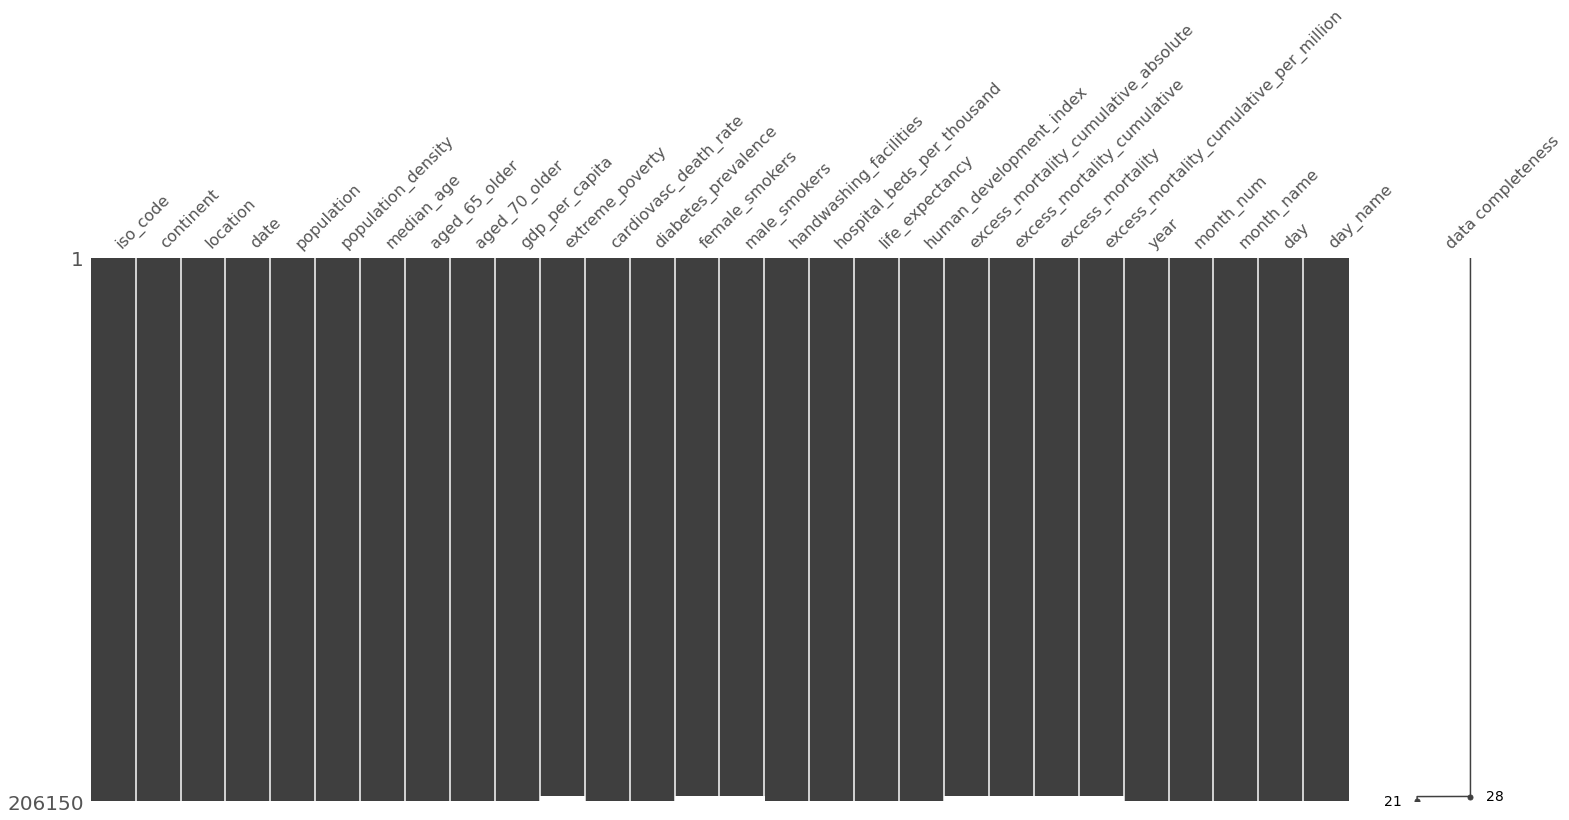

In [70]:
msno.matrix(df_demo, labels=True, sort='descending')

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

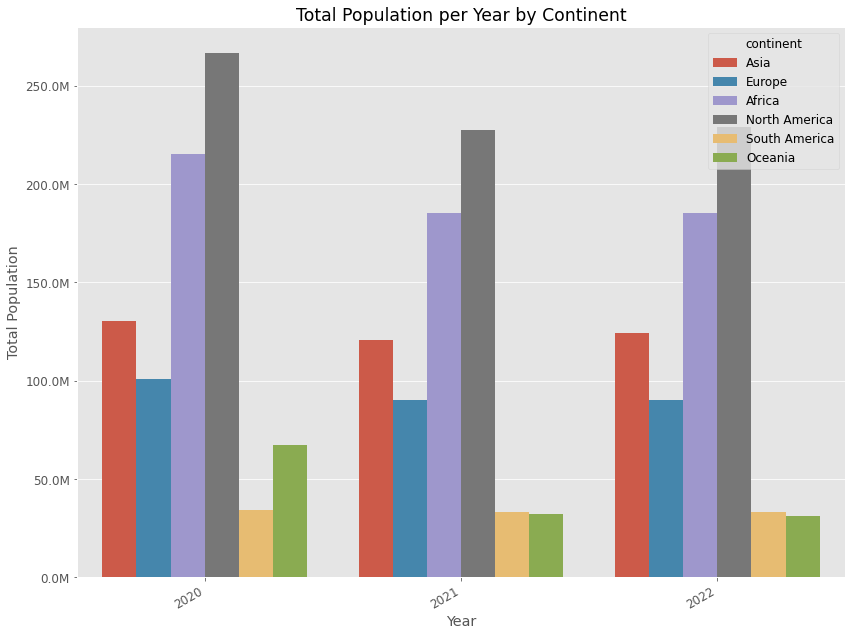

In [71]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', 
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

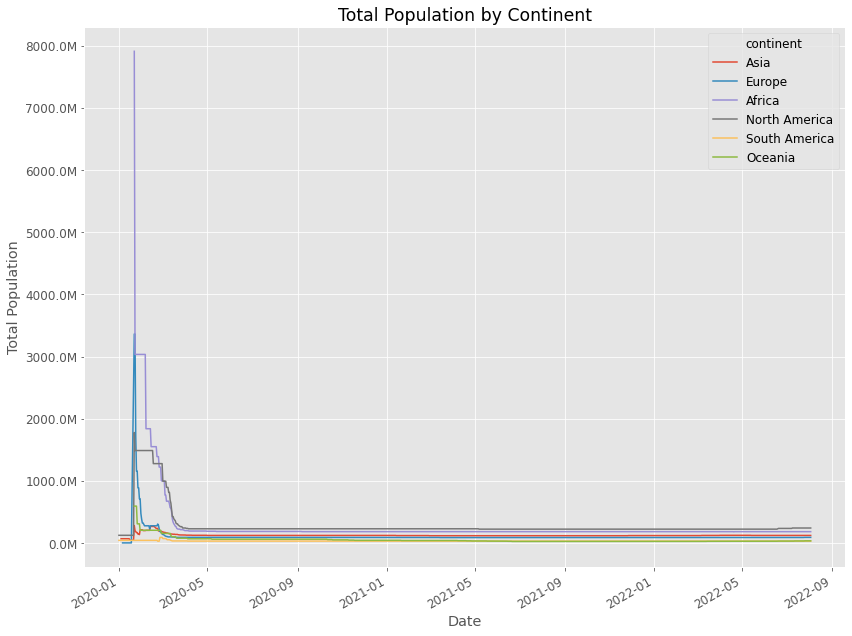

In [72]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

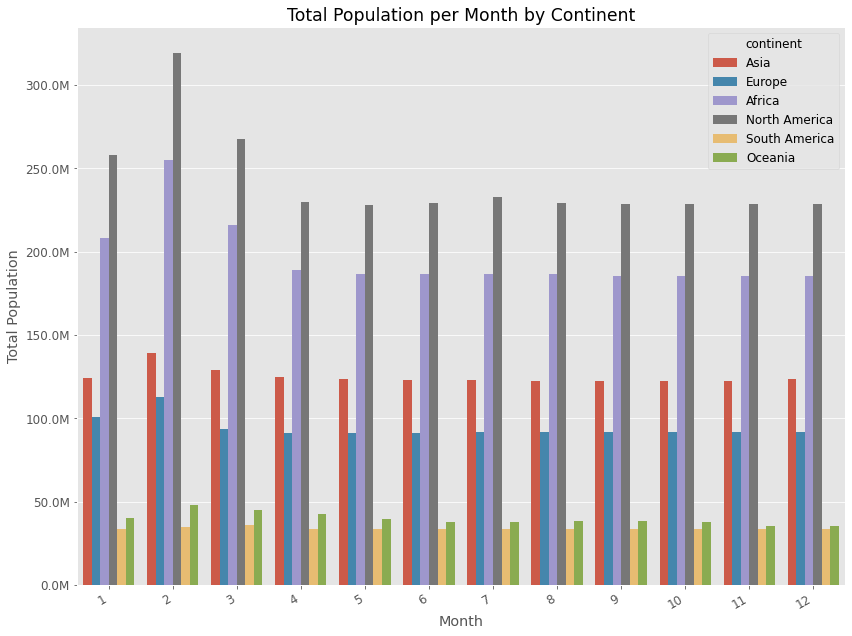

In [73]:
plot_bar(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

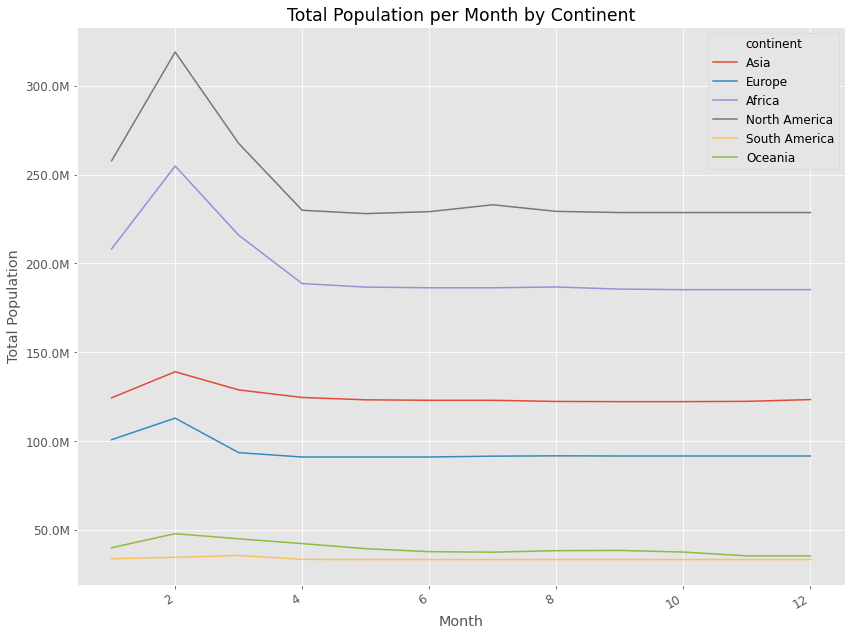

In [74]:
plot_line(
    data=df_demo,
    x='month_num', y='population', hue='continent', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

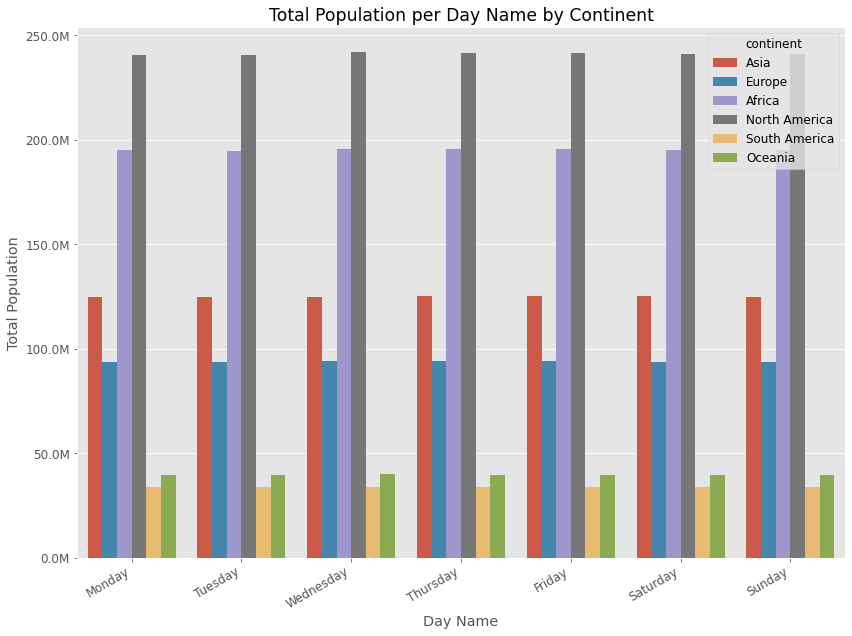

In [75]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

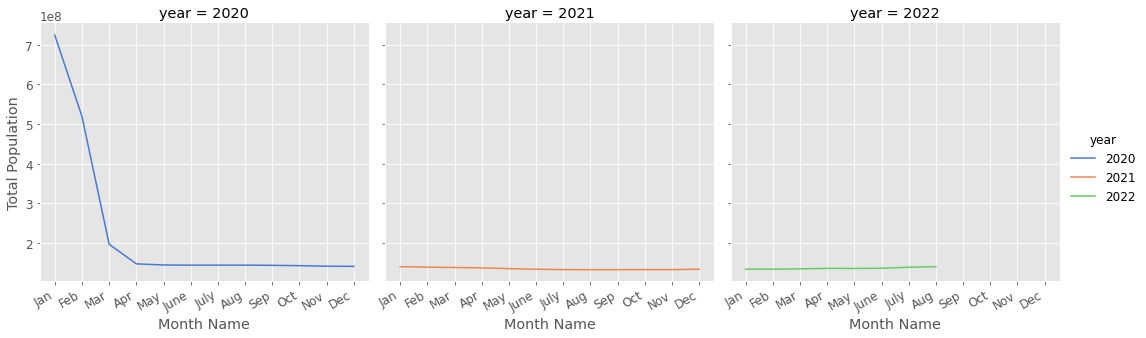

In [76]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

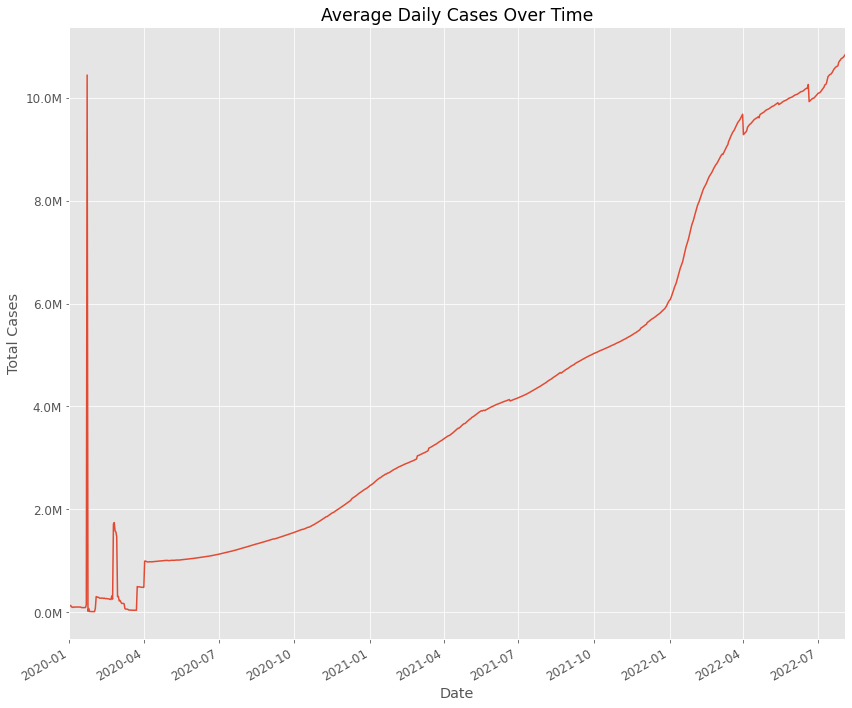

In [77]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

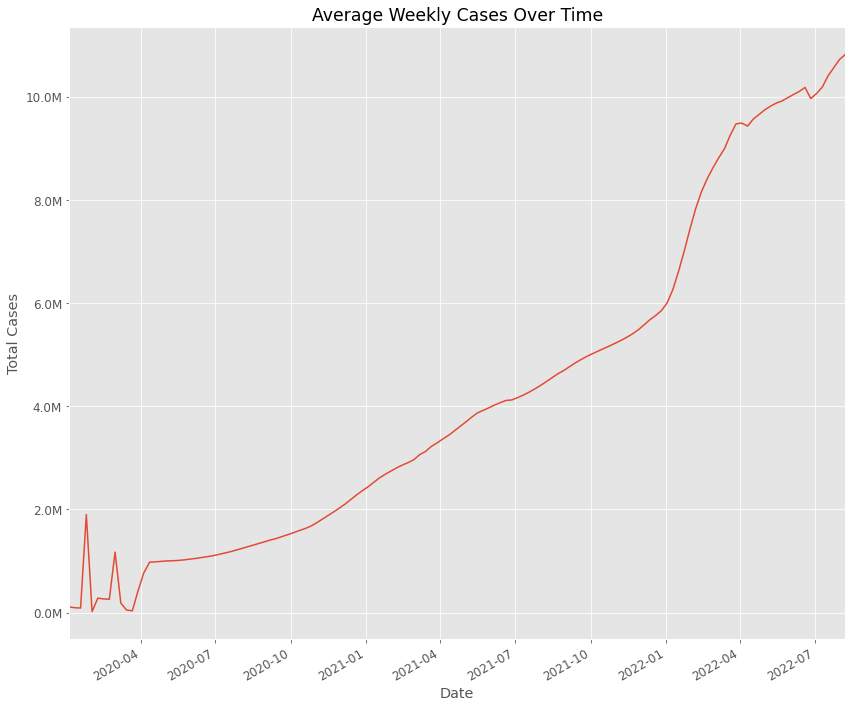

In [78]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

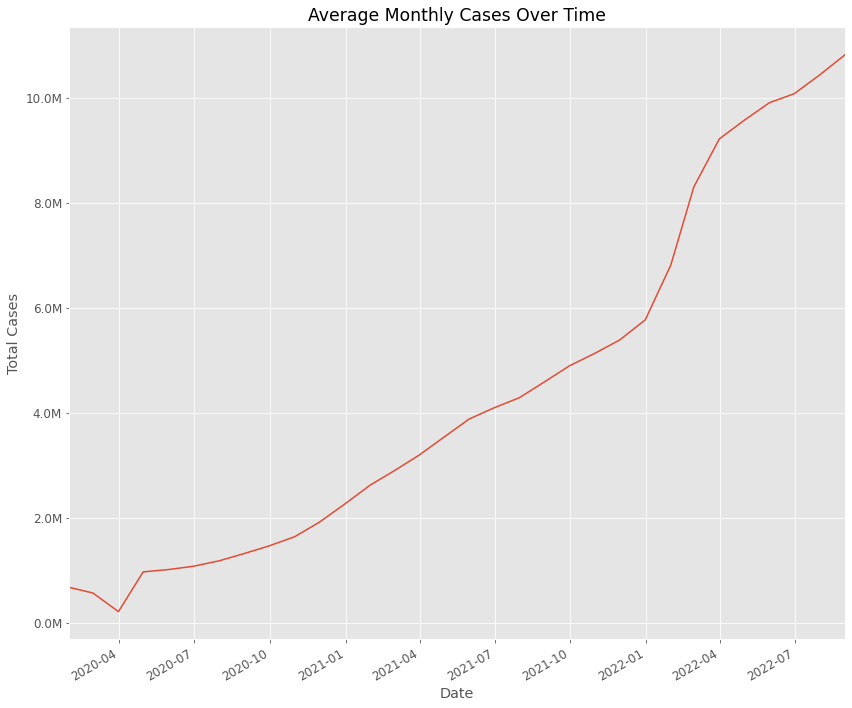

In [79]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

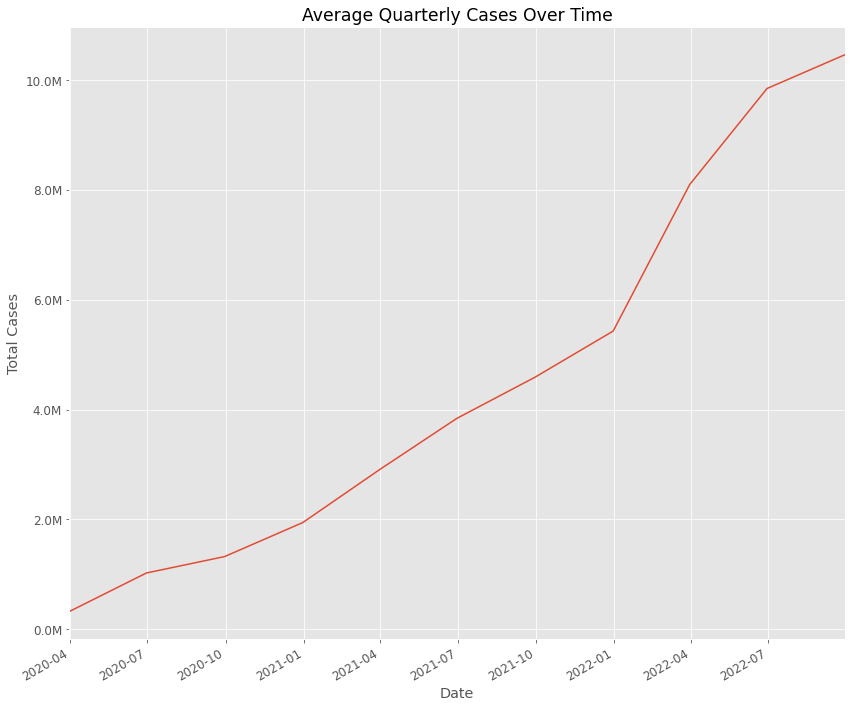

In [80]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

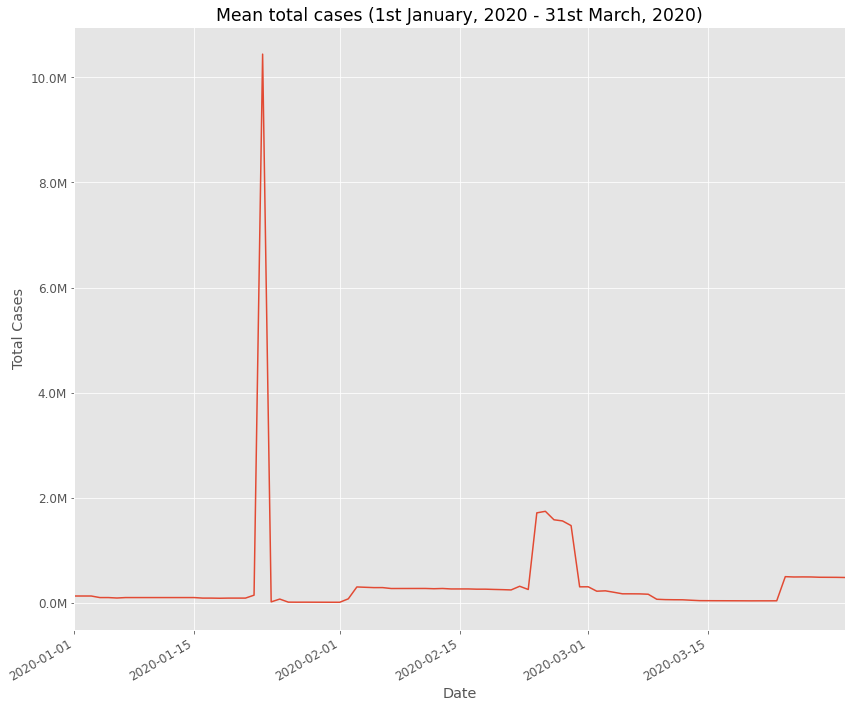

In [81]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-03-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st March, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

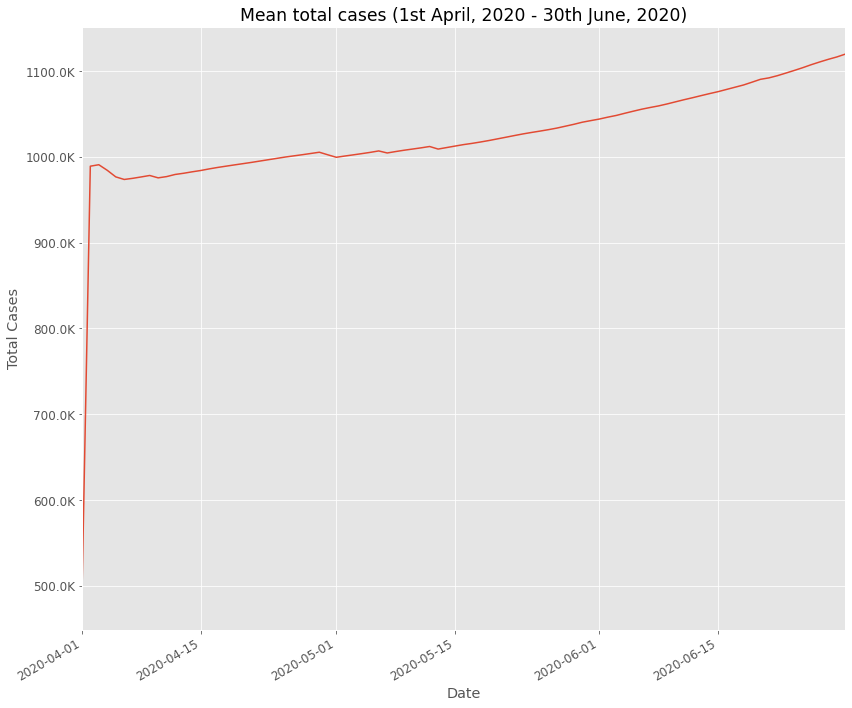

In [82]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-04-01', after='2020-06-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st April, 2020 - 30th June, 2020)',
    formatter=format_tsd
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

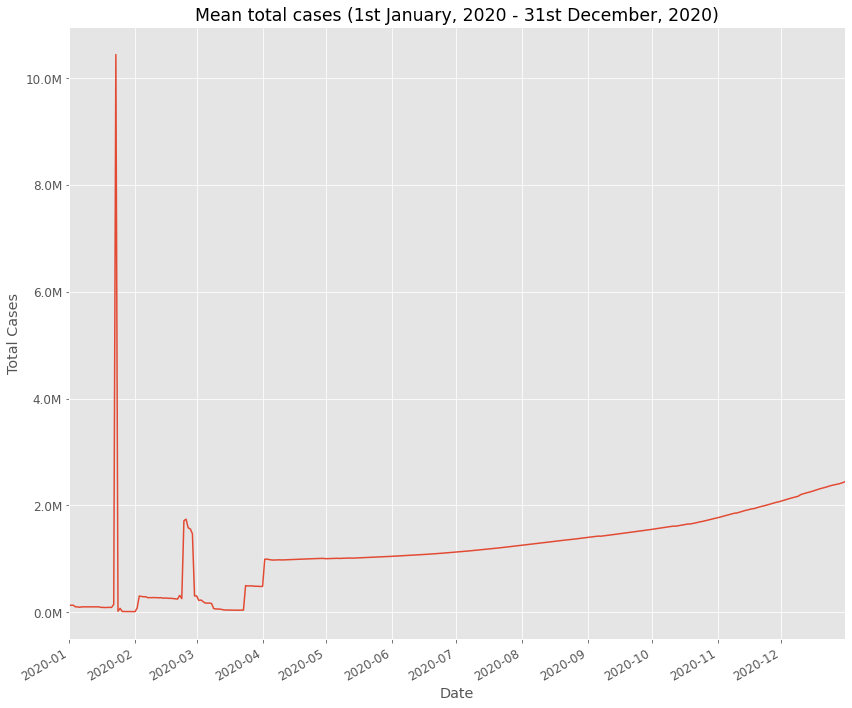

In [83]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

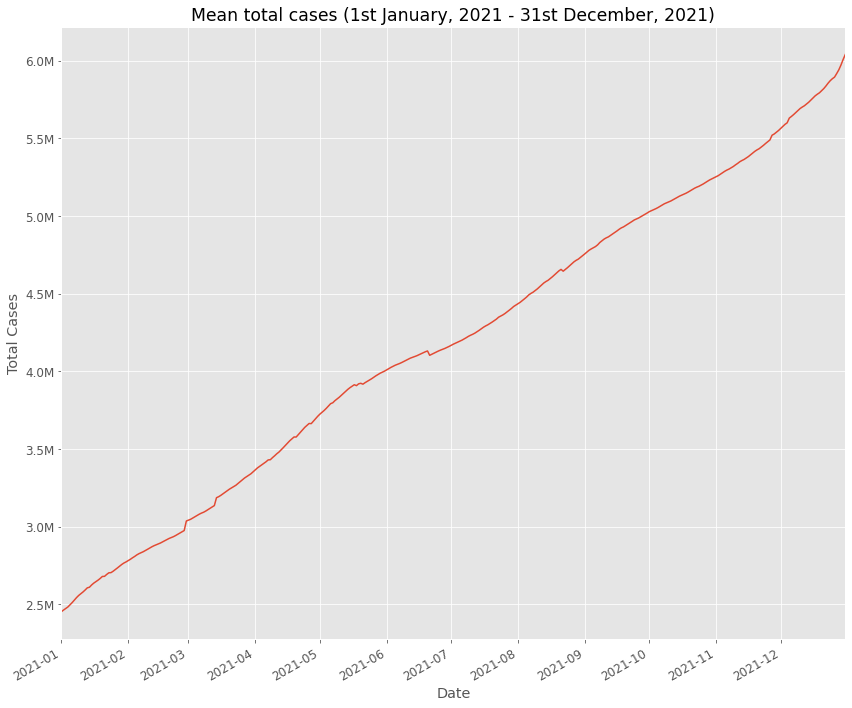

In [84]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

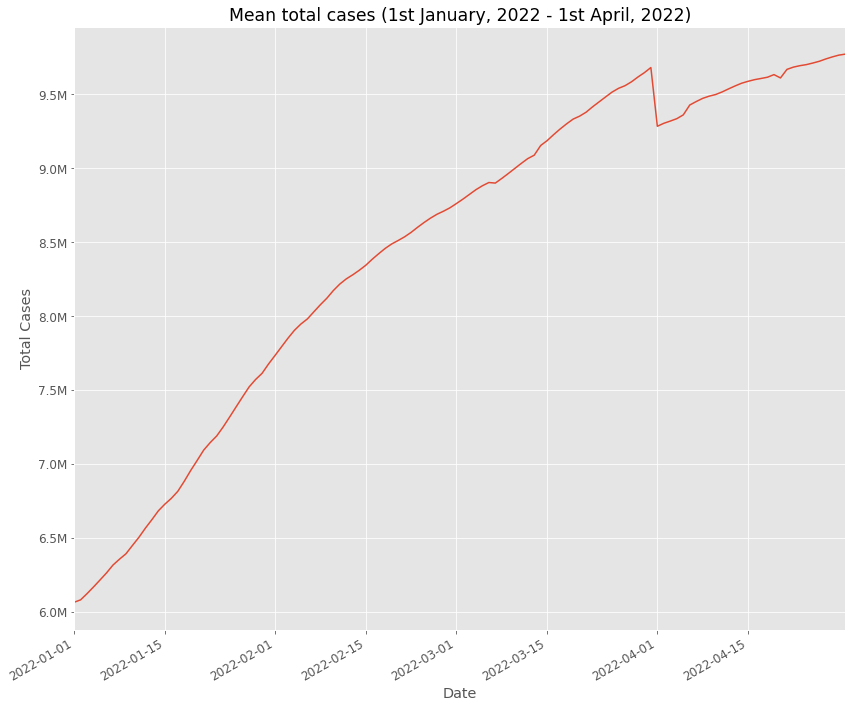

In [85]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-04-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st April, 2022)',
    formatter=format_mill
)